# **Exploración y Análisis de Datos en Aplicaciones** 📱


## Autor: Alejandro Traversa Olazabal

🔗 https://www.linkedin.com/in/alejandro-traversa-olazabal/

## 📚 **Introducción:**
En este trabajo, se aplicarán técnicas de ciencia de datos para analizar un conjunto de datos de aplicaciones de Play Store. A través de la exploración, limpieza y visualización de los datos, se buscarán patrones y tendencias que permitan extraer conclusiones relevantes sobre el comportamiento de las aplicaciones en función de su precio, descargas y calificaciones. Este análisis permitirá demostrar la utilidad de la ciencia de datos en la comprensión del mercado de apps y en la toma de decisiones informadas.

## ¿Comenzamos? 🪐

# **1) Apps de Play Store**

Empezamos por este dataset que reúne más de 10.000 aplicaciones de Play Store, actualizadas a agosto 2018, para analizar el mercado de Android.

### 🔍 Resumen del dataset "googleplaystore.csv".

Este dataset contiene 10,841 registros de aplicaciones de Google Play Store y 13 columnas con información relevante sobre cada app.

### 📂 Variables principales y su significado:

**App**: Nombre de la aplicación.

**Category**: Categoría a la que pertenece (ej. "ART_AND_DESIGN", "GAME", "FINANCE").

**Rating**: Calificación promedio de los usuarios (escala de 1 a 5).

**Reviews**: Número de reseñas de los usuarios.

**Size**: Tamaño de la aplicación.

**Installs**: Número de instalaciones o descargas.

**Type**: Si la app es "Free" o "Paid" (gratuita o paga).

**Price**: Precio en dólares (o "0" si es gratuita).

**Content Rating**: Restricción de edad (Ej: "Everyone", "Teen", "Adults").

**Genres**: Género de la aplicación (puede tener múltiples géneros).

**Last Updated**: Última fecha de actualización.

**Current Ver**: Versión actual de la aplicación.

**Android Ver**: Versión mínima de Android requerida.


###	❓ Preguntas de interés
¿Cuáles son las categorías más populares según número de descargas?

¿Cuál es el promedio de rating o calificación de la Apps de Play Store?

¿Cuál es el tamaño promedio (en Mb) de las Apps?

¿Qué porcentaje del total de Apps son gratuitas?

¿Las Apps más descargadas poseen mejores calificaciones?

¿Las Apps pagas tienen mejor calificación que las gratuitas?

¿Cuántas Apps tienen más de 1 millón de descargas?

¿Qué categorías de Apps poseen mayor tamaño (en Mb)?

¿Las apps más grandes en tamaño tienen menos descargas?

¿Cuál es la categoría de Apps que posee mejor calificación?

### 🎯 Objetivo
El objetivo de este trabajo es realizar un análisis exploratorio del dataset de aplicaciones de Google Play Store para comprender mejor el mercado de apps en Android. A través de la exploración de variables clave como categoría, calificación, número de descargas, precio y tamaño, buscamos identificar patrones y tendencias que ayuden a responder preguntas relevantes sobre el comportamiento de los usuarios y las características de las aplicaciones más exitosas. Además, se analizará la relación entre distintas variables para evaluar factores como el impacto del precio en la cantidad de descargas, la influencia del tamaño de la app en su popularidad y la relación entre el número de reseñas y la calificación promedio. Este análisis permitirá obtener insights valiosos sobre el ecosistema de aplicaciones móviles y cómo ciertos factores pueden influir en el éxito de una app en la tienda.

### 💡 Hipótesis
Veamos la siguiente hipótesis que proponemos plantear y que podría resultar muy interesante para nuestro dataset:

**"Las apps con precios más altos tienden a tener menos descargas, pero su rating promedio es más alto en comparación con las apps gratuitas."**

*Variables involucradas:*

Price (Precio de la App)

Installs (Cantidad de instalaciones o descargas)

Rating (Calificación de la App)

*Justificación:*

Es probable que las Apps pagas tengan menos descargas, ya que los usuarios prefieren opciones gratuitas.
Sin embargo, quienes pagan por una app pueden ser más exigentes y dar calificaciones más altas si la app cumple sus expectativas.
Puede haber una relación inversa entre Price e Installs, pero positiva entre Price y Rating.


Comenzamos importando las librerías que utilizaremos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

A continuación incorporamos el dataset a nuestro colab a través de la URL del raw de Github. Seguidamente lo convertimos en un dataframe de la librería Pandas, consultamos la cantidad de filas y columnas que posee y observamos una pequeña muestra para chequear que se haya cargado correctamente:

In [ ]:
# Enlace directo al archivo en GitHub
apps_url = 'https://raw.githubusercontent.com/TraversaOlazabal/DataScience-Datasets/refs/heads/main/googleplaystore.csv'
df_apps = pd.read_csv(apps_url)

print("Dimensiones del dataset (filas, columnas):", df_apps.shape)
df_apps.head()

Dimensiones del dataset (filas, columnas): (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Seguidamente obtengamos información de las variables, como cantidad de valores en cada una y tipo de datos que representan (por diferencia pueden calcularse los valores nulos o NaN):

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Observado ya un marco general de nuestro dataset, veamos ahora si tenemos registros duplicados:

In [ ]:
# Contar registros duplicados
df_apps.duplicated().sum()

483

Efectivamente existen 483 registros duplicados, debemos eliminarlos:

In [ ]:
df_apps = df_apps.drop_duplicates().reset_index(drop=True)

Volvemos a ver como nos queda el dataset:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


Respecto a las columnas con datos numéricos utilizamos el método "describe" para ver un resumen de los datos que contiene:

In [ ]:
df_apps.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


En la celda anterior observamos un error: el valor máximo de la columna "Rating" nunca debería ser mayor a 5 (ya que las puntuaciones van en escala de 1 a 5) y sin embargo puede observarse en "max" el valor "19". A fin de subsanar esto, procedemos a conocer cuantos registros se encuentran en esta situación:

In [ ]:
# Filtrar valores de Rating mayores a 5
df_apps[df_apps["Rating"] > 5]

# Contar cuántos valores incorrectos hay en Rating
df_apps[df_apps["Rating"] > 5].shape[0]

1

Sabiendo que solo es uno el registro con error procedo a reemplazar este valor por uno igual al promedio de la columna (sin tener en cuenta el valor erróneo), seguidamente chequeamos que la variable presente todos datos correctos:

In [ ]:
# Calcular el promedio de la columna "Rating" sin contar el valor incorrecto
rating_mean = df_apps[df_apps["Rating"] <= 5]["Rating"].mean()

# Asignar el promedio a los valores mayores a 5
df_apps.loc[df_apps["Rating"] > 5, "Rating"] = rating_mean

df_apps.describe() #chequeo que el registro haya desaparecido

,Rating
count,8893.000000
mean,4.187877
std,0.522347
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


A los fines de continuar chequeando que no existan más datos erróneos en nuestro dataset procedemos a analizar los valores para la columna "Category" (Categoría):

In [ ]:
df_apps["Category"].value_counts()

,count
Category,
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


Observamos que "1.9" no es un dato correcto, con lo cual y como sólo es un caso concluimos que lo mejor es buscar a que App pertenece y modificar la categoría por la que entiendemos es la correcta:

In [ ]:
df_apps[df_apps["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.187877,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Vemos que la categoría que correspondería es "PHOTOGRAPHY". Sin embargo al observar el resto de los datos del registro notamos que posee los valores corridos en las columnas, es decir ninguno valor se corresponde con la variable en la que se encuentra. Se concluye entonces, que lo mejor es eliminar el registro (que además no es representativo de la población total), evitando así futuros errores que este pudiera ocasionar:

In [ ]:
df_apps = df_apps.drop(index=9990).reset_index(drop=True)

Chequeamos que se haya eliminado:

In [ ]:
df_apps[df_apps["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Pasamos ahora a analizar la columna "Reviews" (cantidad de reseñas de los usuarios). Como se trata de una variable que debería ser numérica es que primero observamos que tipos de datos contiene:

In [ ]:
# Filtrar valores que no sean números en la columna "Reviews"
valores_erroneos = df_apps[~df_apps["Reviews"].str.isnumeric()]
print(valores_erroneos)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


Ahora que sabemos que todos los valores son numéricos convertimos el tipo de datos (data type) de la columna en numérico:

In [ ]:
df_apps["Reviews"] = df_apps["Reviews"].astype(int)

Verificamos:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


Ahora vamos con un gran desafío: normalizar la columna "Size" (Tamaño de la App):



Primero, es necesario reemplazar "Varies with device" ("Varía según el dispositivo") por NaN, ya que no se dispone de un valor preciso. Luego, se procederá al tratamiento de los valores nulos, ya que, como veremos más adelante, es crucial que estas variables sean completamente numéricas.

Además, es necesario eliminar las letras que acompañan los valores (por ejemplo, "M" para representar la unidad de medida en Mb y "k" para Kb). Posteriormente, los valores expresados en Kb deben ser convertidos a Mb, dividiéndolos entre 1024, con el fin de normalizar la variable y asegurar que todos los elementos estén en la misma unidad de medida: Mb.

Finalmente, se debe cambiar el tipo de dato de la variable a numérico.

In [ ]:
# Reemplazar "Varies with device" por NaN
df_apps["Size"] = df_apps["Size"].replace("Varies with device", np.nan)

# Asegurarse de que los valores con 'k' sean tratados correctamente antes de convertir la columna a texto
df_apps.loc[df_apps["Size"].str.contains("k", na=False), "Size"] = (
    df_apps.loc[df_apps["Size"].str.contains("k", na=False), "Size"]
    .str.replace("k", "", regex=False)
    .astype(float) / 1024  # Convertir de 'k' a MB
)

# Convertir la columna 'Size' a tipo texto
df_apps["Size"] = df_apps["Size"].astype(str)

# Eliminar la "M" en los valores que ya están en MB
df_apps["Size"] = df_apps["Size"].str.replace("M", "", regex=False)

# Convertir toda la columna a tipo float
df_apps["Size"] = df_apps["Size"].astype(float)

# Verificar los cambios
df_apps["Size"].head(60)

,Size
0,19.000000
1,14.000000
2,8.700000
3,25.000000
4,2.800000
5,5.600000
6,19.000000
7,29.000000
8,33.000000
9,3.100000


Normalizada la variable "Size" es el turno de la columna "Installs", para limpiar sus valores debemos quitar los simbolos "+" y "," en cada valor, y seguidamente cambiar el tipo de dato de la variable, que actualmente es Str, por numérico:

In [ ]:
# Eliminar el símbolo "+" y las comas en la columna 'Installs'
df_apps["Installs"] = df_apps["Installs"].str.replace("+", "", regex=False)
df_apps["Installs"] = df_apps["Installs"].str.replace(",", "", regex=False)

# Intentar convertir la columna 'Installs' a tipo numérico
df_apps["Installs"] = pd.to_numeric(df_apps["Installs"], errors="raise")

# Verificar los primeros 60 registros después de la limpieza
df_apps["Installs"].head(60)

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
5,50000
6,50000
7,1000000
8,1000000
9,10000


Observamos que cantidad de valores distintos toma la variable:

In [ ]:
df_apps["Installs"].value_counts()

,count
Installs,
1000000,1488
10000000,1132
100000,1129
10000,1033
1000,890
100,710
5000000,683
500000,517
50000,474


Y finalmente creamos una nueva variable en la que se expresan la cantidad de descargas pero expresadas por bloques de cantidad. Entendemos que esto permitirá trabajar de forma más eficiente con la relación entre variables y el arribo de conclusiones correctas del dataset:

In [ ]:
# Definir los límites de los rangos
bins = [0, 1000, 10000, 100000, 1000000, 10000000, float('inf')]

# Nombres para cada rango
labels = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Crear una nueva columna en el dataframe con los rangos
df_apps['Installs_binned'] = pd.cut(df_apps['Installs'], bins=bins, labels=labels, right=False)

# Ver los primeros registros para verificar
df_apps[['Installs', 'Installs_binned']].head()

,Installs,Installs_binned
0,10000,10k-100k
1,500000,100k-1M
2,5000000,1M-10M
3,50000000,10M+
4,100000,100k-1M


In [ ]:
df_apps["Installs_binned"].value_counts()

,count
Installs_binned,
1M-10M,2171
10M+,1883
0-1k,1791
100k-1M,1646
10k-100k,1507
1k-10k,1359


Veamos nuestra nueva variable creada!:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   App              10357 non-null  object  
 1   Category         10357 non-null  object  
 2   Rating           8892 non-null   float64 
 3   Reviews          10357 non-null  int64   
 4   Size             8831 non-null   float64 
 5   Installs         10357 non-null  int64   
 6   Type             10356 non-null  object  
 7   Price            10357 non-null  object  
 8   Content Rating   10357 non-null  object  
 9   Genres           10357 non-null  object  
 10  Last Updated     10357 non-null  object  
 11  Current Ver      10349 non-null  object  
 12  Android Ver      10355 non-null  object  
 13  Installs_binned  10357 non-null  category
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 1.0+ MB


El turno de la columna "Type": se realizará una observación de los diferentes valores que toma para controlar que no existen errores:

In [ ]:
df_apps["Type"].value_counts()

,count
Type,
Free,9591
Paid,765


Efectivamente se encuentran sólo dos valores posibles: Gratuito y Pago. Los que resultan correctos.

Ahora es el momento de normalizar la columna "Price": lo que hacemos es retirar el signo pesos de modo de poder modificar el tipo de dato de la variable por numérico:

In [ ]:
# Limpiar y convertir "Price" a número
df_apps["Price"] = df_apps["Price"].str.replace("$", "", regex=False).astype(float)

In [ ]:
df_apps["Price"].value_counts()

,count
Price,
0.00,9592
0.99,146
2.99,125
1.99,73
4.99,70
...,...
389.99,1
19.90,1
1.75,1


En este caso también vamos a crear una nueva variable como desprendimiento de una existente, en este caso vamos a establecer rangos para los diferentes precios que pueden tomar las Apps, es una buena forma de poder relacionar estos datos con otras variables al momento de realizar nuestros gráficos bivariables:

In [ ]:
# Definir los límites de los rangos
bins = [0, 0.01, 1, 5, 10, 50, float('inf')]

# Nombres para cada rango
labels = ['0-0.01', '0.01-1', '1-5', '5-10', '10-50', '50+']

# Crear una nueva columna en el dataframe con los rangos
df_apps['Price_binned'] = pd.cut(df_apps['Price'], bins=bins, labels=labels, right=False) # Esto hace que el límite superior no esté incluido en el bloque
#y se asigne a la siguiente categoría. Por ejemplo, un precio de 10 será asignado al bloque 10-50 y no al bloque 5-10.

# Ver los primeros registros para verificar
df_apps[['Price', 'Price_binned']].head()

,Price,Price_binned
0,0.0,0-0.01
1,0.0,0-0.01
2,0.0,0-0.01
3,0.0,0-0.01
4,0.0,0-0.01


In [ ]:
df_apps["Price_binned"].value_counts()

,count
Price_binned,
0-0.01,9592
1-5,456
0.01-1,146
5-10,86
10-50,54
50+,23


Analicemos ahora la variable "Content Rating":

In [ ]:
df_apps["Content Rating"].value_counts()

,count
Content Rating,
Everyone,8382
Teen,1146
Mature 17+,447
Everyone 10+,377
Adults only 18+,3
Unrated,2


Debemos reemplazar el valor "Unrated" por NaN para poder luego darle el tratamiento adecuado al caso:

In [ ]:
# Reemplazar "Unrated" por NaN en la columna 'Content Rating'
df_apps["Content Rating"] = df_apps["Content Rating"].replace("Unrated", np.nan)

Chequeamos que Unrated ya no forme parte como valor de la variable:

In [ ]:
df_apps["Content Rating"].value_counts()

,count
Content Rating,
Everyone,8382
Teen,1146
Mature 17+,447
Everyone 10+,377
Adults only 18+,3


Excelente! Continuemos con el análisis de las variables de nuestro dataset, ahora analicemos la columna "Genres":

In [ ]:
df_apps["Genres"].value_counts()

,count
Genres,
Tools,842
Entertainment,588
Education,527
Business,427
Medical,408
...,...
Parenting;Brain Games,1
Travel & Local;Action & Adventure,1
Lifestyle;Pretend Play,1


Esta variable no presenta errores.

Ahora pasemos a la variable "Last Update", como hace alusión a la fecha en que se produjo la última actualización de la App es correcto cambiar el tipo de dato por uno de fecha de tiempo (datetime):

In [ ]:
# Convertir la columna 'Last Update' a tipo datetime
df_apps["Last Updated"] = pd.to_datetime(df_apps["Last Updated"])

# Verificar los primeros registros
df_apps["Last Updated"].head(10)

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
5,2017-03-26
6,2018-04-26
7,2018-06-14
8,2017-09-20
9,2018-07-03


Verificamos:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10357 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           8892 non-null   float64       
 3   Reviews          10357 non-null  int64         
 4   Size             8831 non-null   float64       
 5   Installs         10357 non-null  int64         
 6   Type             10356 non-null  object        
 7   Price            10357 non-null  float64       
 8   Content Rating   10355 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10357 non-null  datetime64[ns]
 11  Current Ver      10349 non-null  object        
 12  Android Ver      10355 non-null  object        
 13  Installs_binned  10357 non-null  category      
 14  Price_binned     10357 non-null  categ

Ahora veamos un resumen de nuestras variables numéricas (se podrá observar como han aumentado desde la primera consulta donde sólo había 1):

In [ ]:
df_apps.describe().round(2)

,Rating,Reviews,Size,Installs,Price,Last Updated
count,8892.00,10357.00,8831.00,1.035700e+04,10357.00,10357
mean,4.19,405904.61,21.29,1.415776e+07,1.03,2017-11-14 09:25:19.320266496
min,1.00,0.00,0.01,0.000000e+00,0.00,2010-05-21 00:00:00
25%,4.00,32.00,4.70,1.000000e+03,0.00,2017-09-03 00:00:00
50%,4.30,1680.00,13.00,1.000000e+05,0.00,2018-05-20 00:00:00
75%,4.50,46416.00,29.00,1.000000e+06,0.00,2018-07-19 00:00:00
max,5.00,78158306.00,100.00,1.000000e+09,400.00,2018-08-08 00:00:00
std,0.52,2696777.84,22.54,8.023955e+07,16.28,NaN


Veamosló pero de forma más clara:

In [ ]:
# Configurar pandas para no mostrar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Ahora, al mostrar describe(), los números se mostrarán sin notación y con sólo dos decimales
df_apps.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,8892.00,10357.00,8831.00,10357.00,10357.00,10357
mean,4.19,405904.61,21.29,14157759.44,1.03,2017-11-14 09:25:19.320266496
min,1.00,0.00,0.01,0.00,0.00,2010-05-21 00:00:00
25%,4.00,32.00,4.70,1000.00,0.00,2017-09-03 00:00:00
50%,4.30,1680.00,13.00,100000.00,0.00,2018-05-20 00:00:00
75%,4.50,46416.00,29.00,1000000.00,0.00,2018-07-19 00:00:00
max,5.00,78158306.00,100.00,1000000000.00,400.00,2018-08-08 00:00:00
std,0.52,2696777.84,22.54,80239553.87,16.28,NaN


¿Mejor no? Sigamos con las últimas variables, ahora es el turno de "Current Ver" (Versión actual de la aplicación):

In [ ]:
df_apps["Current Ver"].value_counts()

,count
Current Ver,
Varies with device,1302
1.0,802
1.1,260
1.2,177
2.0,149
...,...
3.18.5,1
1.3.A.2.9,1
9.9.1.1910,1


Notamos que predomina "Varies with device" que si bien no es un dato preciso se concluye que lo mejor es dejarlo de esta forma ya que se trata de una variable categórica (de ser numérica seguramente habría sido otro el tratamiento ya que este valor impediría cambiar el tipo de dato de la variable por uno justamente numérico). Sí es importante cambiar los datos nulos "NaN" por un valor nuevo creado discrecionalmente: "Desconocido".

In [ ]:
# Reemplazar los valores NaN por "Desconocido"
df_apps["Current Ver"] = df_apps["Current Ver"].fillna("Desconocido")

# Verificar los cambios
df_apps["Current Ver"].head(10)

,Current Ver
0,1.0.0
1,2.0.0
2,1.2.4
3,Varies with device
4,1.1
5,1.0
6,1.1
7,6.1.61.1
8,2.9.2
9,2.8


In [ ]:
df_apps["Current Ver"].value_counts()

,count
Current Ver,
Varies with device,1302
1.0,802
1.1,260
1.2,177
2.0,149
...,...
3.18.5,1
1.3.A.2.9,1
9.9.1.1910,1


Ahora es el turno de la variable "Android ver" (Versión mínima de Android requerida), veamos que valores encontramos:

In [ ]:
df_apps["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2379
4.0.3 and up,1451
4.0 and up,1337
Varies with device,1221
4.4 and up,894
2.3 and up,643
5.0 and up,546
4.2 and up,387
2.3.3 and up,279


Al igual que en el caso anterior aquí entendemos que lo mejor es mantener el valor "Varies with device" y modificar el valor NaN por "Desconocido":

In [ ]:
# Reemplazar los valores NaN por "Desconocido"
df_apps["Android Ver"] = df_apps["Android Ver"].fillna("Desconocido")

# Verificar los cambios
df_apps["Android Ver"].head(10)

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
5,2.3 and up
6,4.0.3 and up
7,4.2 and up
8,3.0 and up
9,4.0.3 and up


Veamos:

In [ ]:
df_apps["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2379
4.0.3 and up,1451
4.0 and up,1337
Varies with device,1221
4.4 and up,894
2.3 and up,643
5.0 and up,546
4.2 and up,387
2.3.3 and up,279


Analizada la última de nuestras variables veamos como va quedando nuestro dataset:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10357 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           8892 non-null   float64       
 3   Reviews          10357 non-null  int64         
 4   Size             8831 non-null   float64       
 5   Installs         10357 non-null  int64         
 6   Type             10356 non-null  object        
 7   Price            10357 non-null  float64       
 8   Content Rating   10355 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10357 non-null  datetime64[ns]
 11  Current Ver      10357 non-null  object        
 12  Android Ver      10357 non-null  object        
 13  Installs_binned  10357 non-null  category      
 14  Price_binned     10357 non-null  categ

Se observa una evolución positiva en nuestro dataset, ahora veamos como tratar los datos faltantes o nulos "NaN". Empecemos por la variable "Type":

In [ ]:
# Mostrar las filas donde "Type" es nulo
df_apps[df_apps["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_binned,Price_binned
8667,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,0-1k,0-0.01


Se observa que el valor debería ser "Free" ya que el precio de la App es 0:

In [ ]:
# Reemplazar el valor nulo en "Type" por "Free"
df_apps.loc[df_apps["Type"].isnull(), "Type"] = "Free"

# Verificar que no queden nulos
df_apps["Type"].isnull().sum()

0

Veamos ahora los valores nulos (NaN) de la variable "Content Rating":

In [ ]:
# Mostrar las filas donde "Content Rating" es nulo
df_apps[df_apps["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_binned,Price_binned
6843,Best CG Photography,FAMILY,NaN,1,2.50,500,Free,0.00,NaN,Entertainment,2015-06-24,5.2,3.0 and up,0-1k,0-0.01
7795,DC Universe Online Map,TOOLS,4.10,1186,6.40,50000,Free,0.00,NaN,Tools,2012-02-27,1.3,2.3.3 and up,10k-100k,0-0.01


Sólo hay dos casos y por los nombres de las Apps y sus categorías se infiere que corresponde asignarles el valor Everyone:

In [ ]:
# Reemplazar el valor nulo en "Content Rating" por "Everyone"
df_apps.loc[df_apps["Content Rating"].isnull(), "Content Rating"] = "Everyone"

# Verificar que no queden nulos
df_apps["Content Rating"].isnull().sum()

0

Al analizar la variable "Rating", llegamos a la conclusión de que, para evitar posibles efectos que puedan distorsionar las conclusiones futuras del dataset, lo más adecuado es reemplazar cada dato faltante en esta variable por el promedio general de las valoraciones del resto de las aplicaciones.

In [ ]:
# Reemplazar valores NaN en "Rating" con el promedio de la columna
df_apps["Rating"] = df_apps["Rating"].fillna(df_apps["Rating"].mean())

# Verificar que no haya valores nulos
df_apps.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1526
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


Perfecto ya no tenemos datos nulos para la variable "Rating".

Finalmente, procedemos a normalizar los valores NaN en la columna "Size". Para ello, reemplazaremos estos valores por la mediana de la categoría a la que pertenece cada aplicación. Esta técnica es preferible porque mantiene la distribución de los datos dentro de cada categoría, evitando sesgos que podrían surgir al usar un valor global. Esto asegura que el dataset refleje de manera más precisa las características de las aplicaciones en cada categoría, mejorando la calidad de los análisis posteriores.

In [ ]:
df_apps["Size"] = df_apps.groupby("Category")["Size"].transform(lambda x: x.fillna(x.median()))

Veamos ahora:

In [ ]:
df_apps.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


Ya no quedan más datos nulos o "NaN"!

Y de esta forma **finalizamos la primera etapa de Preparación de los Datos**. Descargamos (a modo de back up) un .csv con el dataset limpio y normalizado:

In [ ]:
# Guarda el dataframe limpio en un archivo CSV
df_apps.to_csv('googleplaystorecolab.csv', index=False)

# Descarga el archivo CSV a tu computadora
files.download('googleplaystorecolab.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Análisis Estadístico Descriptivo:**

Continuamos ahora con el análisis de nuestras variables, veamos que nos están diciendo, qué concluisiones podemos sacar...

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10357 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           10357 non-null  float64       
 3   Reviews          10357 non-null  int64         
 4   Size             10357 non-null  float64       
 5   Installs         10357 non-null  int64         
 6   Type             10357 non-null  object        
 7   Price            10357 non-null  float64       
 8   Content Rating   10357 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10357 non-null  datetime64[ns]
 11  Current Ver      10357 non-null  object        
 12  Android Ver      10357 non-null  object        
 13  Installs_binned  10357 non-null  category      
 14  Price_binned     10357 non-null  categ

In [ ]:
df_apps.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10357.00,10357.00,10357.00,10357.00,10357.00,10357
mean,4.19,405904.61,20.15,14157759.44,1.03,2017-11-14 09:25:19.320266496
min,1.00,0.00,0.01,0.00,0.00,2010-05-21 00:00:00
25%,4.10,32.00,5.40,1000.00,0.00,2017-09-03 00:00:00
50%,4.20,1680.00,12.00,100000.00,0.00,2018-05-20 00:00:00
75%,4.50,46416.00,27.00,1000000.00,0.00,2018-07-19 00:00:00
max,5.00,78158306.00,100.00,1000000000.00,400.00,2018-08-08 00:00:00
std,0.48,2696777.84,21.28,80239553.87,16.28,NaN


Hacemos aquí un paréntesis para comentar que con estos datos es posible responder a dos **preguntas de interés** planteadas al comienzo de este trabajo:

La primera de ellas es **¿Cuál es el tamaño promedio (en Mb) de las Apps?** La respuesta como podemos observar es: 20,15 Mb.

La segunda es: **¿Cuál es el promedio de rating o calificación de las Apps de Play Store?** La respuesta es: 4,19 puntos (en una escala de 1 a 5).

In [ ]:
df_apps.describe(include="object")

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
count,10357,10357,10357,10357,10357,10357,10357
unique,9659,33,2,5,119,2832,34
top,ROBLOX,FAMILY,Free,Everyone,Tools,Varies with device,4.1 and up
freq,9,1943,9592,8384,842,1302,2379


## **GRÁFICOS**

📌 1. Gráficos Univariables

✅ Distribución de Categorías de las Apps

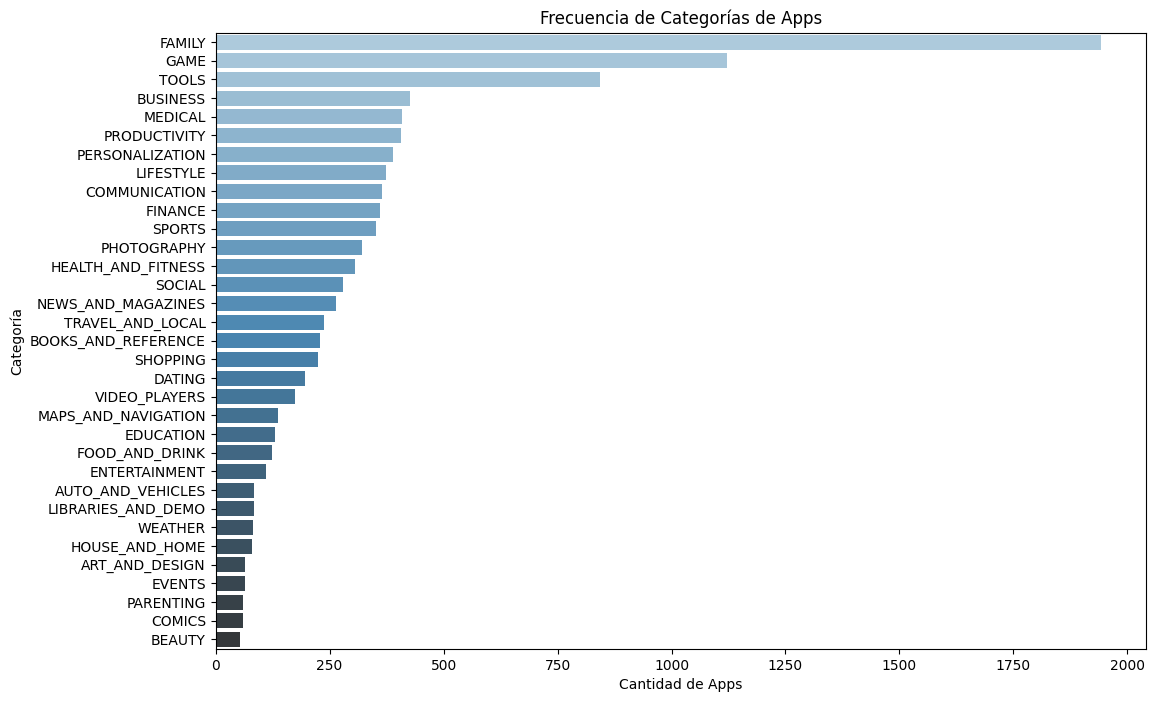

In [ ]:
# Contar la frecuencia de cada categoría
category_counts = df_apps['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Category', data=category_counts, hue='Category', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Frecuencia de Categorías de Apps')
plt.xlabel('Cantidad de Apps')
plt.ylabel('Categoría')
plt.show()

✅ Cantidad de descargas según Categorías de las Apps

El gráfico nos indica que la categoría que más cantidad de Apps posee es Family, seguido de Game y de Tools. Por otro lado las categorías Comics y Beauty son las dos que menos cantidad de Apps poseen
Las categorías con mayor cantidad de Apps representan un mercado más grande y competitivo, mientras que las categorías con menos cantidad pueden representar nichos más específicos con menos competencia, pero también con un público más limitado. Dependiendo del objetivo, tanto la saturación como la especialización ofrecen oportunidades distintas para el desarrollo y el marketing de aplicaciones.

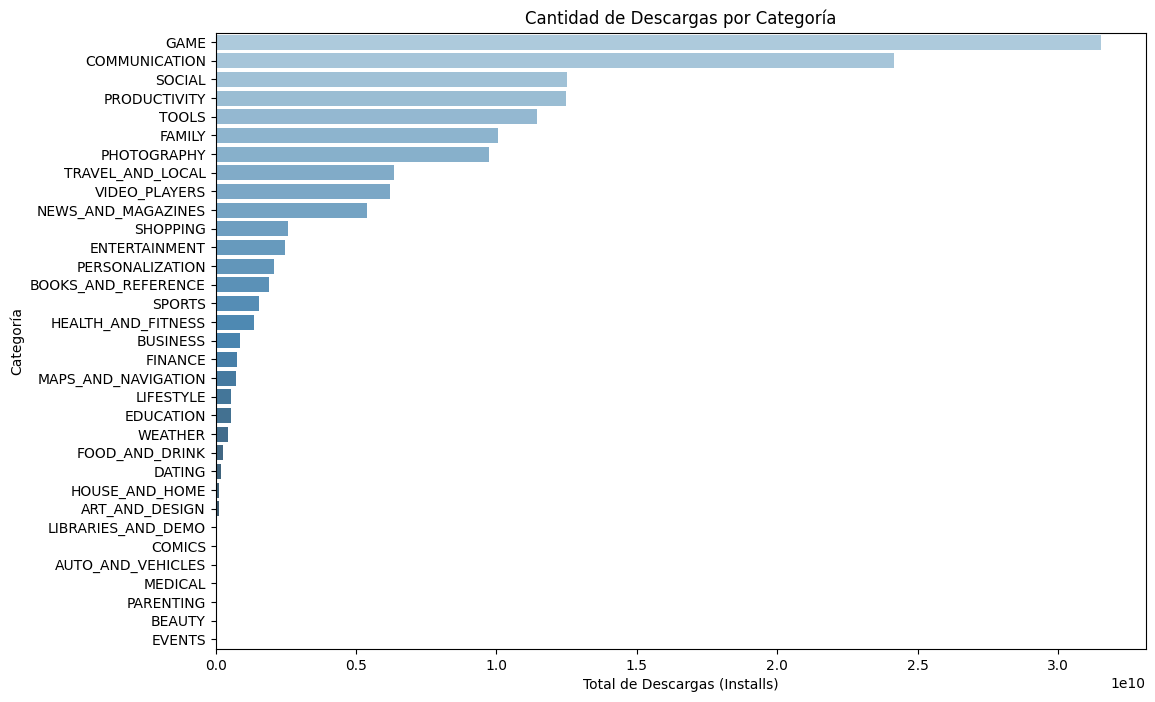

In [ ]:
# Sumar la cantidad de instalaciones por categoría
category_installs = df_apps.groupby('Category')['Installs'].sum().reset_index()

# Ordenar de mayor a menor cantidad de instalaciones
category_installs = category_installs.sort_values(by='Installs', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Installs', y='Category', data=category_installs, hue='Category', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Descargas por Categoría')
plt.xlabel('Total de Descargas (Installs)')
plt.ylabel('Categoría')
plt.show()

El gráfico nos muestra que las categoría con más descargas son: Game, Communication, Social. Esto es realmente muy interesante ya que aquí existen Categorías (como Communication y Social) que no se encuentran entre los primeros lugares cuando se observa la cantidad de Apps por categoría (ver gráfico anterior a este). Esto permitiría arribar a algunas conclusiones: **El hecho de que algunas categorías que tenían muchas apps no sean las más descargadas sugiere que tener más aplicaciones en una categoría no garantiza más descargas. En cambio, el éxito de una categoría parece estar más relacionado con el valor que ofrecen las aplicaciones más populares dentro de ella**. Ejemplo: Si la categoría "Social" tiene pocas apps pero muchas descargas, significa que aplicaciones como Facebook, Instagram o WhatsApp dominan el mercado y tienen millones de usuarios.

Una categoría con muchas apps pero pocas descargas totales podría indicar que hay una gran oferta, pero la demanda no es tan alta (o que la mayoría de las apps no son muy populares).
Una categoría con pocas apps pero muchas descargas sugiere que hay algunas apps "dominantes" que concentran la mayoría de los usuarios.

De esta forma contestamos una **pregunta de interés** planteada al comienzo de este trabajo: **¿Cuáles son las categorías más populares según el número de descargas?** La respuesta es: Las categorías Game, Communication y Social.

✅ Distribución de Ratings de las Apps

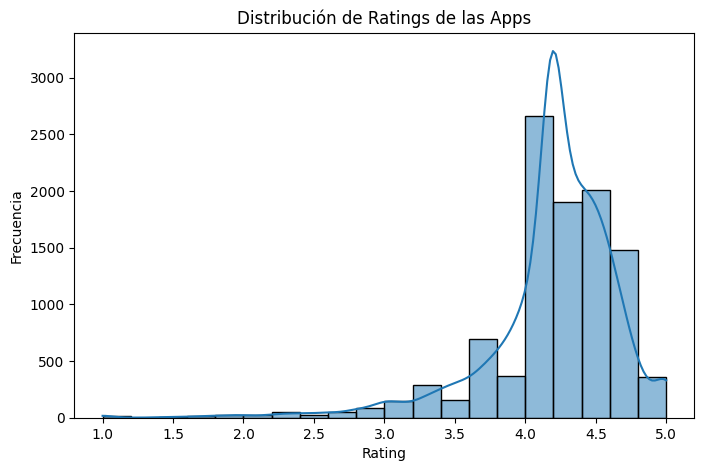

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_apps["Rating"], bins=20, kde=True)
plt.title("Distribución de Ratings de las Apps")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que en general los usuarios de las Apps de Play Store están conformes con las Apps que han descargado, ya que la mayoría de las Apps poseen promedios de calificaciones por encima de 4 puntos sobre un máximo de 5.

✅ Boxplot de Ratings (Detección de Outliers)

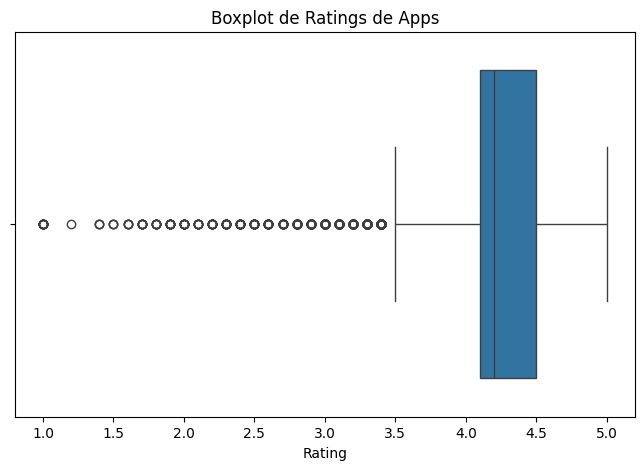

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_apps["Rating"])
plt.title("Boxplot de Ratings de Apps")
plt.show()

Este gráfico tipo Boxplot (o diagrama de cajas y bigotes) muestra que la mayoría de las calificaciones promedio de las Apps se encuentran entre 4 y 4,5 puntos sobre el máximo de 5. Los puntos fuera de los bigotes del gráficos son los denominados "outliers" (valores atípicos) y son, en este caso, valor extremadamente pequeños en comparación con la distribución general, sin embargo son valores reales y deben ser tenidos en cuenta.

✅ Distribución del Tamaño de las Apps (Size)

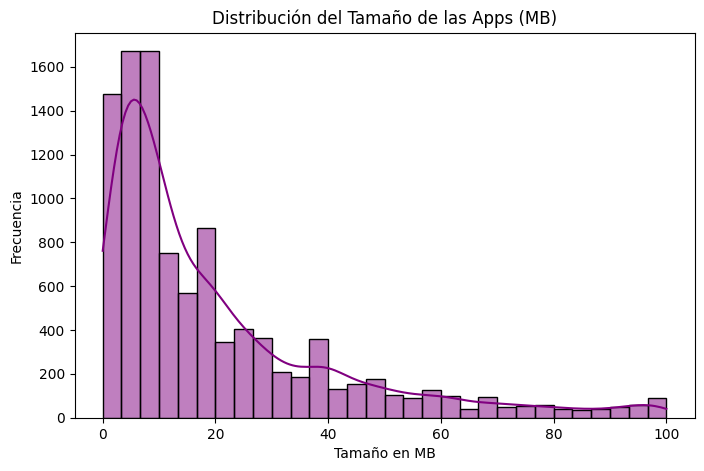

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_apps["Size"], bins=30, kde=True, color="purple")
plt.title("Distribución del Tamaño de las Apps (MB)")
plt.xlabel("Tamaño en MB")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que la mayoría de las Apps tienen un tamaño de hasta 20 Mb. Siguiendo un patrón de tendencia negativa en la que cuanto más pesa la App menos cantidad hay (con excepciones que pueden observarse en la curvatura de la línea).

✅ Distribución de Descargas (Installs)

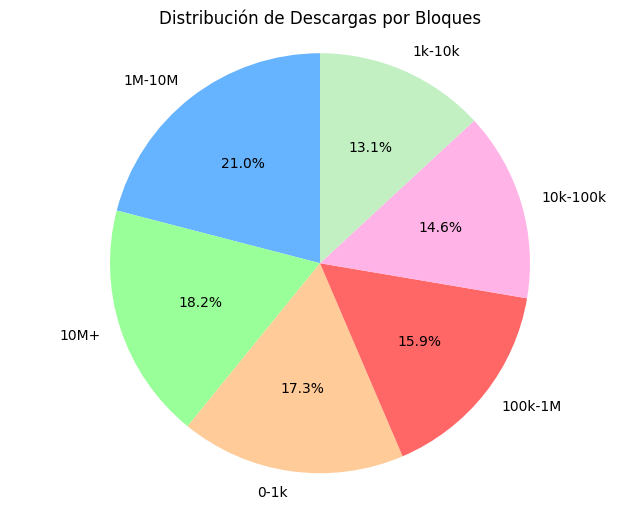

In [ ]:
# Contar la frecuencia de cada bloque
frequencies = df_apps['Installs_binned'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(frequencies, labels=frequencies.index, autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff','#99ff99','#ffcc99','#ff6666', '#ffb3e6', '#c2f0c2'])
plt.title('Distribución de Descargas por Bloques')
plt.axis('equal')  # Para que el gráfico de torta sea un círculo
plt.show()

In [ ]:
# Definir el orden deseado de los bloques
ordered_bins = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Asegurarnos de que 'installs_binned' tenga los bloques en el orden correcto
df_apps['Installs_binned'] = pd.Categorical(df_apps['Installs_binned'], categories=ordered_bins, ordered=True)

# Contar la frecuencia de cada bloque
frequency = df_apps['Installs_binned'].value_counts().sort_index()

# Calcular el porcentaje de cada frecuencia
percentage = (frequency / frequency.sum()) * 100

# Crear la tabla con las frecuencias y porcentajes
table = pd.DataFrame({
    'Frecuencia': frequency,
    'Porcentaje': percentage.round(2)
})

# Mostrar la tabla
table

,Frecuencia,Porcentaje
Installs_binned,,
0-1k,1791,17.29
1k-10k,1359,13.12
10k-100k,1507,14.55
100k-1M,1646,15.89
1M-10M,2171,20.96
10M+,1883,18.18


Observando el gráfico anterior y más claramente en la tabla precedente, es posible afirmar que 4054 Apps (2171 + 1883) poseen más de un millón de descargas, lo que representa el 39,14% del total de nuestro dataset. De esta forma contestamos a la **pregunta de interés: ¿Cuántas Apps tienen más de 1 millón de descargas?** La respuesta es, entonces, 4054 Apps.

✅ Proporción de Apps Gratuitas vs. Pagas

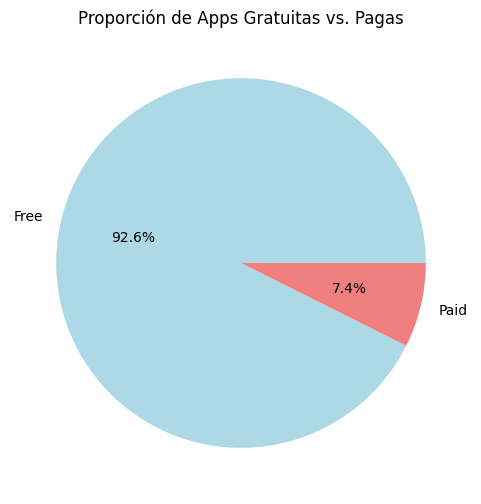

In [ ]:
plt.figure(figsize=(6, 6))
df_apps["Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Proporción de Apps Gratuitas vs. Pagas")
plt.ylabel("")
plt.show()

El gráfico nos muestra que la gran mayoría de las Apps del dataset son gratuitas, de esta forma se contesta a otra de las **preguntas de interés: ¿Qué porcentaje del total de Apps son gratuitas?** La respuesta es: un 92,6%.

✅ Cantidad de Apps por Intervalo de Precios

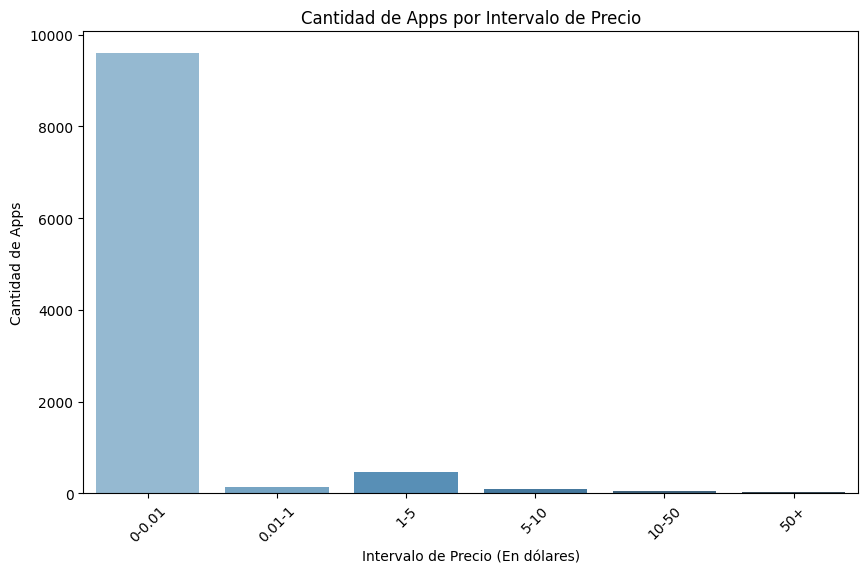

In [ ]:
# Contar la frecuencia de cada intervalo de precio
price_counts = df_apps['Price_binned'].value_counts().reset_index()
price_counts.columns = ['Price_binned', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_binned', y='Count', data=price_counts, hue='Price_binned', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Apps por Intervalo de Precio')
plt.xlabel('Intervalo de Precio (En dólares)')
plt.ylabel('Cantidad de Apps')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x
plt.show()

Para verlo mejor quitemos por un momento las Apps gratuitas de nuestro gráfico:

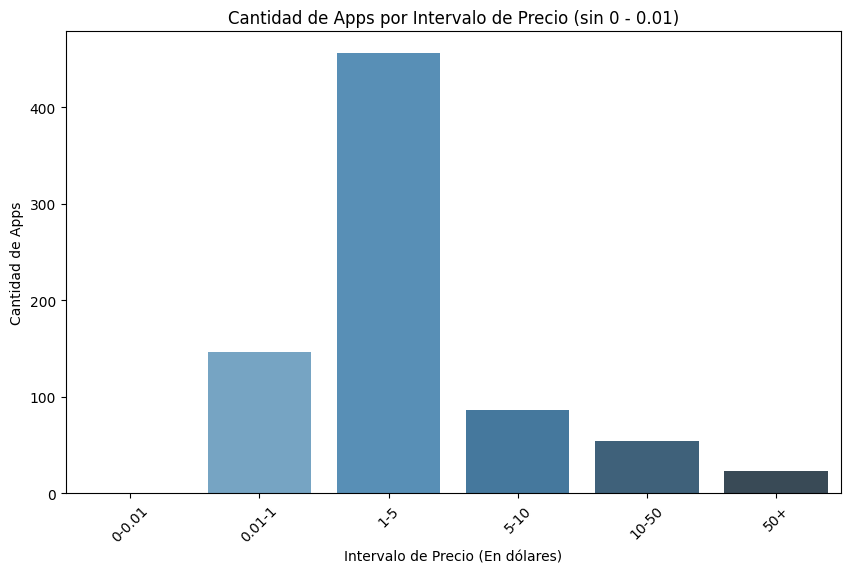

In [ ]:
# Filtrar el intervalo (0-0.01)
price_counts_filtrado = df_apps[df_apps['Price_binned'] != '0-0.01']['Price_binned'].value_counts().reset_index()
price_counts_filtrado.columns = ['Price_binned', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_binned', y='Count', data=price_counts_filtrado, hue='Price_binned', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Apps por Intervalo de Precio (sin 0 - 0.01)')
plt.xlabel('Intervalo de Precio (En dólares)')
plt.ylabel('Cantidad de Apps')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x
plt.show()

En los dos gráficos anteriores se muestra la cantidad de aplicaciones por intervalo de precio. En el primero se incluyen tanto las aplicaciones gratuitas como las de pago, mientras que en el segundo se ha eliminado la barra correspondiente a las apps sin costo. Esto permite visualizar con mayor detalle la distribución de las aplicaciones pagas en cada rango de precio.

Si bien inicialmente se observa un comportamiento inverso, en general, existe una tendencia clara: a medida que el precio aumenta, la cantidad de aplicaciones disponibles disminuye.

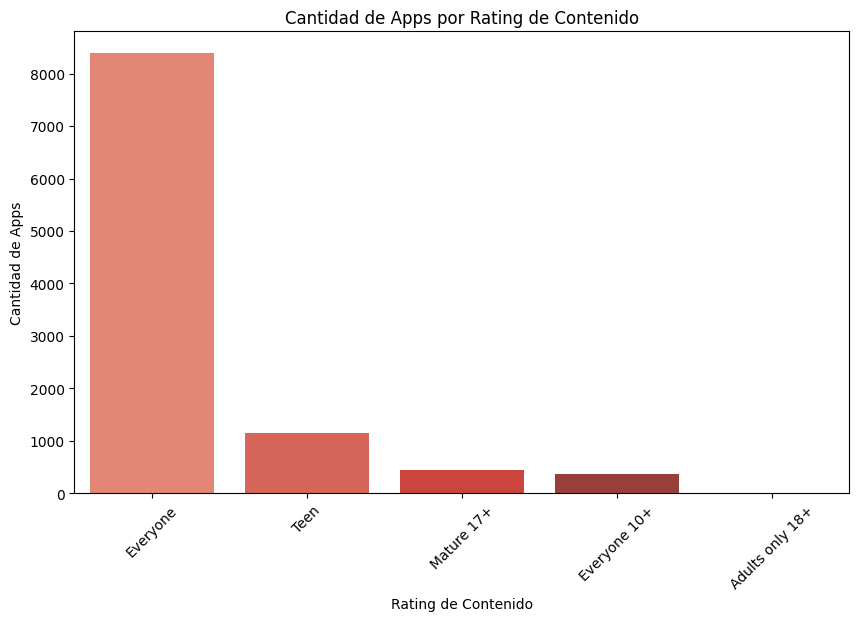

In [ ]:
# Contar la frecuencia de cada categoría de 'Content Rating'
content_rating_counts = df_apps['Content Rating'].value_counts().reset_index()
content_rating_counts.columns = ['Content Rating', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Content Rating', y='Count', data=content_rating_counts, hue='Content Rating', palette='Reds_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Apps por Rating de Contenido')
plt.xlabel('Rating de Contenido')
plt.ylabel('Cantidad de Apps')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x
plt.show()

El gráfico muestra la cantidad de Apps que existen de acuerdo a las restricciones de edad. La gran mayoría es apta para todos los usuarios, es decir, de cualquier edad.

📌 2. Gráficos Bivariables

✅ Matriz de Correlación

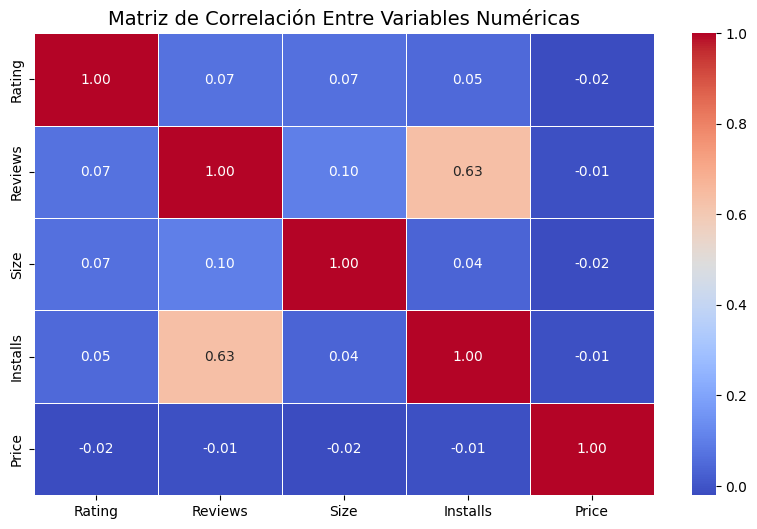

In [ ]:
# Filtrar solo las columnas numéricas
df_corr = df_apps.select_dtypes(include=["number"])

# Crear la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Entre Variables Numéricas", fontsize=14)
plt.show()

La **matriz de correlación** es una herramienta clave para identificar relaciones positivas o negativas entre variables numéricas. En este caso, observamos que la relación más fuerte se da entre las variables "Installs" y "Reviews", con un coeficiente de correlación de 0.64.

Si bien este valor no indica una relación perfectamente lineal, sí sugiere una asociación significativa: **a medida que aumenta la cantidad de instalaciones (Installs), también tiende a aumentar la cantidad de reseñas (Reviews)**. Esto es lógico, ya que una mayor base de usuarios suele generar más interacciones y retroalimentación en forma de comentarios y calificaciones.

✅ Relación entre Descargas (Installs) y Ratings

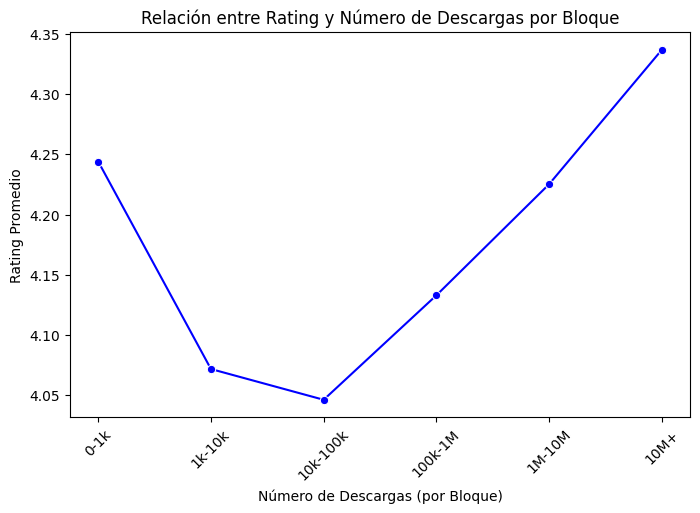

In [ ]:
# Agrupar por bloque de instalaciones y calcular el promedio de rating
rating_by_installs = df_apps.groupby('Installs_binned', observed=False)['Rating'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Rating', data=rating_by_installs, marker='o', color='b')
plt.title('Relación entre Rating y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

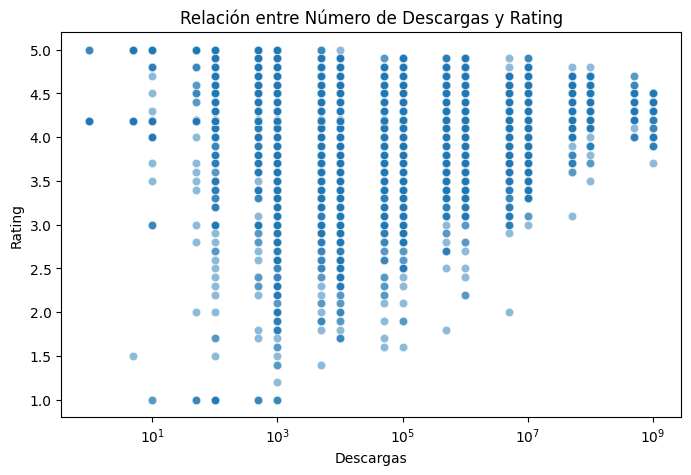

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_apps["Installs"], y=df_apps["Rating"], alpha=0.5)
plt.xscale("log")
plt.title("Relación entre Número de Descargas y Rating")
plt.xlabel("Descargas")
plt.ylabel("Rating")
plt.show()

Los gráficos anteriores muestran que la relación entre rating y cantidad de descargas no es lineal, sino que sigue un comportamiento curvo. Inicialmente, a medida que las aplicaciones acumulan más descargas, su calificación tiende a disminuir. Sin embargo, a partir de un umbral aproximado de 100.000 descargas, la tendencia se revierte y el rating comienza a aumentar conforme crece la cantidad de descargas.

Este patrón podría indicar que las aplicaciones con pocas descargas suelen recibir calificaciones más altas debido a un público inicial más reducido y posiblemente sesgado. En cambio, las apps con una base de usuarios mucho mayor pueden haber pasado por múltiples actualizaciones y mejoras, lo que, con el tiempo, contribuye a una mejor valoración general.

Estos datos permiten constestar a otra **pregunta de interés** incialmente planteada: **¿Las Apps más descargadas poseen mejores calificaciones?**. La respuesta es sí, a partir de las 100 mil descargas cuanto mayor es la cantidad de descargas de la App mejor calificación posee.

✅ Relación entre Descargas (Installs) y Reviews

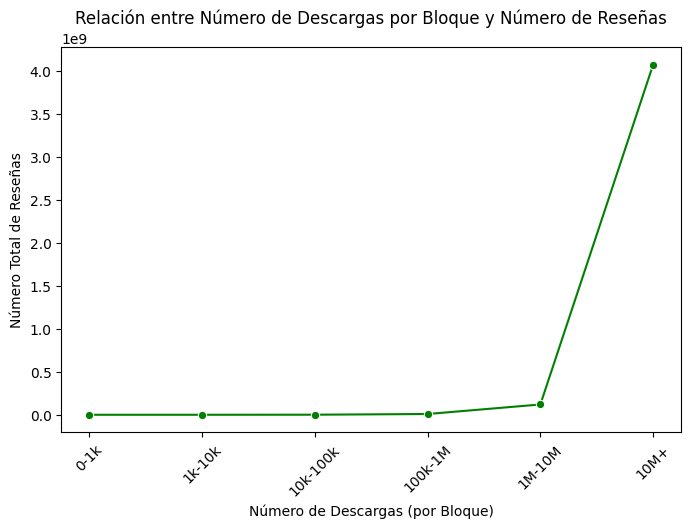

In [ ]:
# Agrupar por bloque de instalaciones y calcular la suma de reseñas
reviews_by_installs = df_apps.groupby('Installs_binned', observed=False)['Reviews'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Reviews', data=reviews_by_installs, marker='o', color='g')
plt.title('Relación entre Número de Descargas por Bloque y Número de Reseñas')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Número Total de Reseñas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

Se deja afuera del análisis los últimos dos bloques (para que no distorcione la interpretación del gráfico):

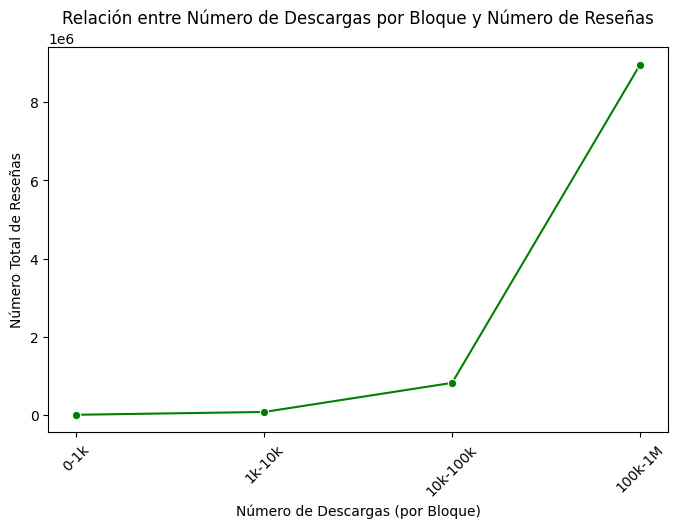

In [ ]:
# Agrupar por bloque de instalaciones y calcular la suma de reseñas
reviews_by_installs = df_apps.groupby('Installs_binned', observed=False)['Reviews'].sum().reset_index()

# Eliminar los dos últimos bloques de descargas
reviews_by_installs = reviews_by_installs[~reviews_by_installs['Installs_binned'].isin(['10M+', '1M-10M'])]

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Reviews', data=reviews_by_installs, marker='o', color='g')
plt.title('Relación entre Número de Descargas por Bloque y Número de Reseñas')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Número Total de Reseñas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

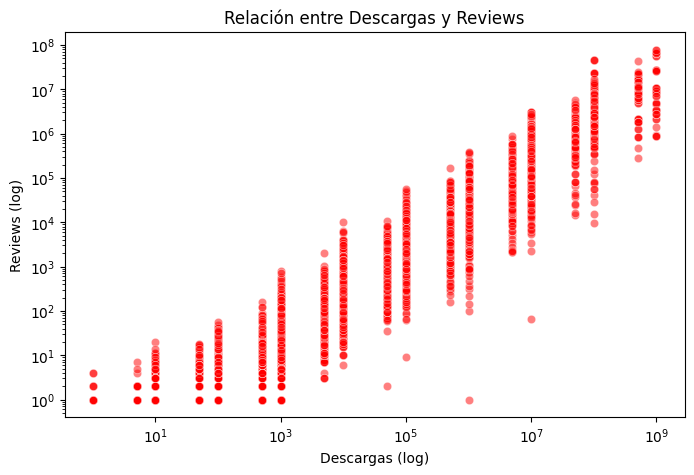

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_apps["Installs"], y=df_apps["Reviews"], alpha=0.5, color="red")
plt.xscale("log")
plt.yscale("log")
plt.title("Relación entre Descargas y Reviews")
plt.xlabel("Descargas (log)")
plt.ylabel("Reviews (log)")
plt.show()

Los gráficos anteriores refuerzan la conclusión que ya habíamos anticipado al analizar la matriz de correlación: **existe una relación directa y significativa entre la cantidad de descargas y el número de reseñas que reciben las aplicaciones**.

Este comportamiento es esperable, ya que a medida que una app alcanza un mayor número de usuarios, también aumenta la probabilidad de que estos dejen una reseña. Sin embargo, este vínculo podría no ser estrictamente proporcional, ya que otros factores, como la satisfacción del usuario, la funcionalidad de la app o estrategias de incentivo para dejar comentarios, también pueden influir en la cantidad de reseñas recibidas.

✅ Relación entre Reviews y Rating

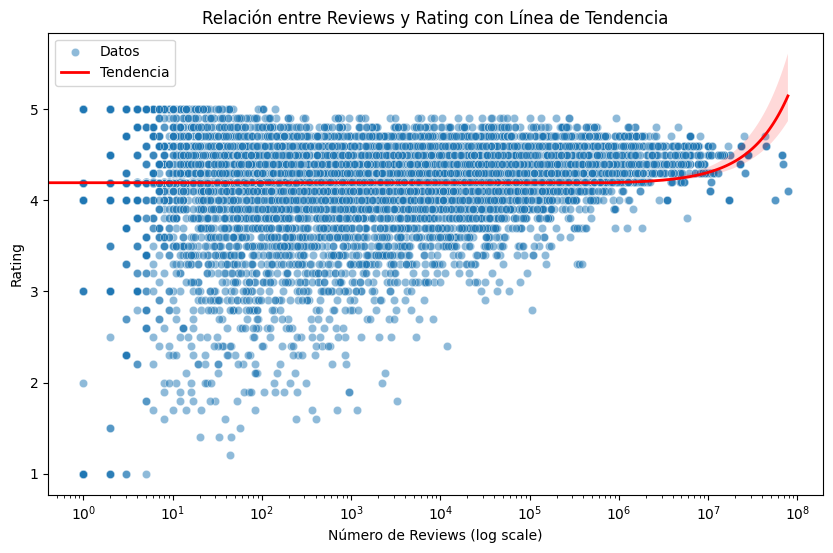

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df_apps["Reviews"], y=df_apps["Rating"], alpha=0.5, label="Datos")
sns.regplot(x=df_apps["Reviews"], y=df_apps["Rating"], scatter=False, color="red", line_kws={"linewidth":2}, label="Tendencia")

plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.xlabel("Número de Reviews (log scale)")
plt.ylabel("Rating")
plt.title("Relación entre Reviews y Rating con Línea de Tendencia")
plt.legend()

plt.show()

Este gráfico indica que, en general, la calificación de las aplicaciones parece permanecer relativamente constante independientemente de las variaciones en la cantidad de reseñas. Sin embargo, a medida que la cantidad de reseñas aumenta significativamente, se observa un incremento en las calificaciones, lo que sugiere que las aplicaciones con una base más amplia de usuarios tienden a recibir valoraciones más altas conforme aumenta la interacción de los usuarios.

✅ Precio Promedio de las Apps por cada Intervalo de Descarga

In [ ]:
# Calcular el precio promedio por cada bloque de instalaciones
price_avg_by_bin = df_apps.groupby('Installs_binned', observed=True)['Price'].mean()

# Ver los resultados
price_avg_by_bin

,Price
Installs_binned,
0-1k,1.65
1k-10k,2.83
10k-100k,1.97
100k-1M,0.52
1M-10M,0.03
10M+,0.01


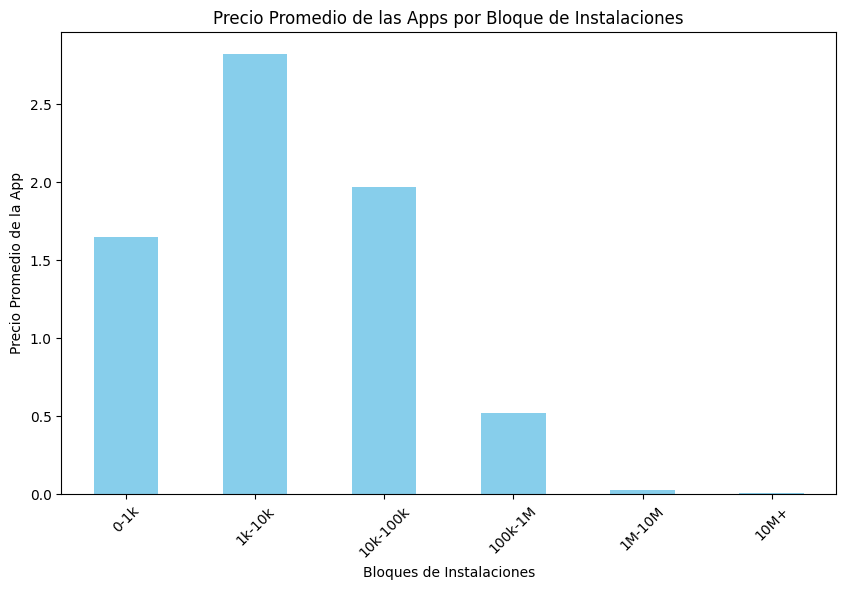

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
price_avg_by_bin.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.title('Precio Promedio de las Apps por Bloque de Instalaciones')
plt.xlabel('Bloques de Instalaciones')
plt.ylabel('Precio Promedio de la App')
plt.xticks(rotation=45)  # Para que las etiquetas de los bloques se vean bien

# Mostrar el gráfico
plt.show()

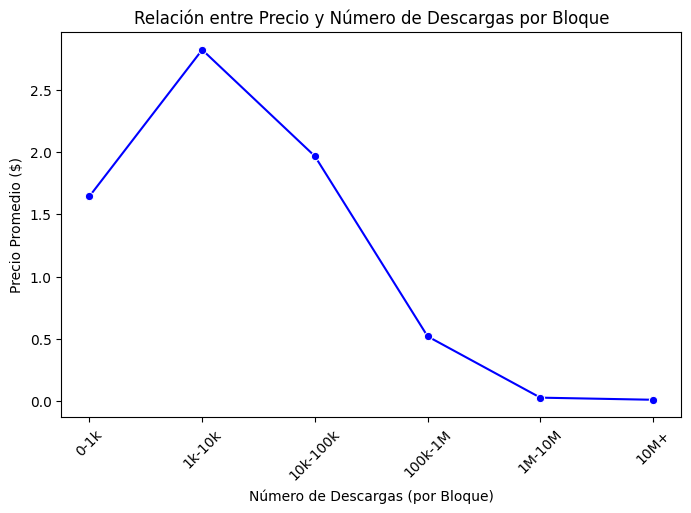

In [ ]:
# Agrupar por bloque de instalaciones y calcular el precio promedio
price_by_installs = df_apps.groupby('Installs_binned', observed=False)['Price'].mean().reset_index()

# Eliminar los dos últimos bloques de descargas
price_by_installs = price_by_installs[~price_by_installs['Installs_binned'].str.contains('10\+|50\+')]

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Price', data=price_by_installs, marker='o', color='b')
plt.title('Relación entre Precio y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

In [ ]:
# Aplicar la escala logarítmica
df_apps['log_price'] = np.log1p(df_apps['Price'])  # np.log1p para evitar log(0)
df_apps['log_installs'] = np.log1p(df_apps['Installs'])

# Calcular la nueva correlación
correlation = df_apps[['log_price', 'log_installs']].corr()
print(correlation)

              log_price  log_installs
log_price          1.00         -0.20
log_installs      -0.20          1.00


Los gráficos muestran una clara tendencia: **a medida que el precio de las aplicaciones disminuye, la cantidad de descargas aumenta**. Este patrón refleja una preferencia generalizada por parte de los usuarios hacia las aplicaciones gratuitas o de bajo costo. Una posible explicación de este comportamiento es que los usuarios suelen ser más reacios a pagar por una app sin antes probarla. Las aplicaciones gratuitas o de bajo precio reducen el riesgo percibido, ya que los usuarios sienten que su inversión es mínima en comparación con el valor que pueden obtener. Además, en un mercado saturado de opciones, las apps con precios bajos o gratuitas se destacan y pueden captar una mayor base de usuarios. Esta tendencia también puede estar influenciada por la creciente preferencia por modelos de negocio freemium, donde las apps gratuitas ofrecen funcionalidades básicas mientras que las características premium se pagan, lo que puede atraer a más usuarios inicialmente.

✅ Comparación de Apps Gratuitas vs. Pagas en Descargas

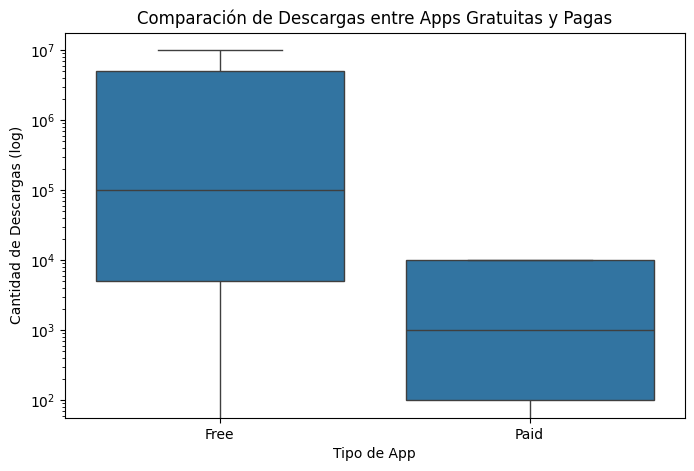

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_apps["Type"], y=df_apps["Installs"], showfliers=False)
plt.yscale("log")
plt.title("Comparación de Descargas entre Apps Gratuitas y Pagas")
plt.xlabel("Tipo de App")
plt.ylabel("Cantidad de Descargas (log)")
plt.show()

Promedio de descargas por tipo de aplicación:
   Type  Average_Installs
0  Free       15279679.80
1  Paid          90491.35


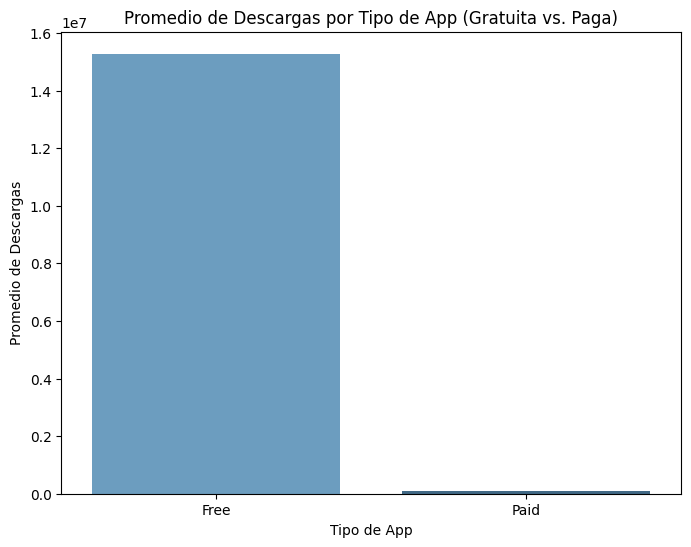

In [ ]:
# Calcular el promedio de descargas para aplicaciones gratuitas y pagas
avg_installs = df_apps.groupby('Type')['Installs'].mean().reset_index()

# Renombrar las columnas para mayor claridad
avg_installs.columns = ['Type', 'Average_Installs']

# Mostrar los promedios antes de graficar
print("Promedio de descargas por tipo de aplicación:")
print(avg_installs)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Average_Installs', data=avg_installs, hue='Type', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Promedio de Descargas por Tipo de App (Gratuita vs. Paga)')
plt.xlabel('Tipo de App')
plt.ylabel('Promedio de Descargas')
plt.show()

Como se confirmó en el análisis previo de los gráficos, **se observa una preferencia clara por parte de los usuarios por las aplicaciones gratuitas en comparación con las de pago, especialmente en términos de cantidad de descargas**. Esto resalta la tendencia de los usuarios a optar por opciones sin costo, lo que puede estar relacionado con la percepción de menor riesgo al no tener que realizar una inversión inicial.

✅ Comparación de Apps Gratuitas vs. Pagas en Rating

Promedios de Rating por Tipo de App:
   Type  Average_Rating
0  Free            4.18
1  Paid            4.25


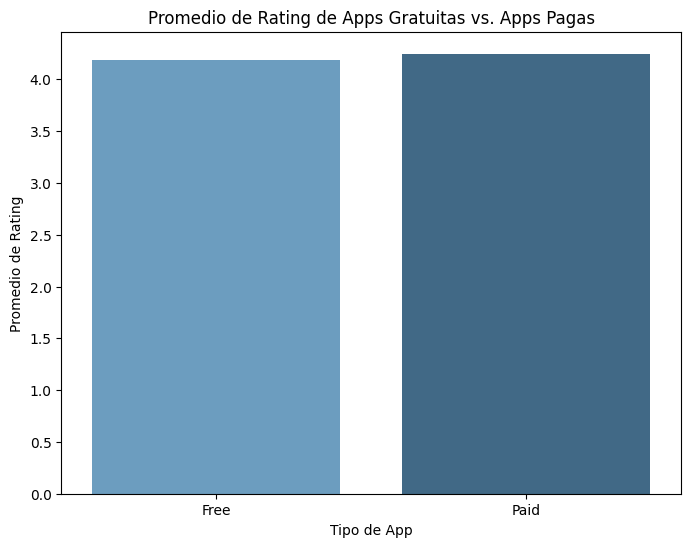

In [ ]:
# Calcular el promedio de rating para aplicaciones gratuitas y pagas
avg_ratings = df_apps.groupby('Type')['Rating'].mean().reset_index()

# Renombrar las columnas para mayor claridad
avg_ratings.columns = ['Type', 'Average_Rating']

# Mostrar los promedios antes de graficar
print("Promedios de Rating por Tipo de App:")
print(avg_ratings)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Average_Rating', data=avg_ratings, hue='Type', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Promedio de Rating de Apps Gratuitas vs. Apps Pagas')
plt.xlabel('Tipo de App')
plt.ylabel('Promedio de Rating')
plt.show()

Con base en lo observado, podemos concluir que las aplicaciones de pago tienden a tener mejores calificaciones que las gratuitas. Este hallazgo responde a una de las **preguntas clave** de nuestro análisis: **¿Las apps pagas tienen mejor calificación que las gratuitas?** La respuesta es sí.

Una posible explicación para este resultado es que las aplicaciones de pago suelen estar más cuidadas en cuanto a desarrollo, soporte y actualizaciones, dado que los desarrolladores invierten más recursos para asegurar una experiencia de usuario de calidad. Además, las aplicaciones pagas suelen atraer a un público más comprometido y dispuesto a pagar por un servicio de calidad, lo que podría llevar a calificaciones más altas. Por otro lado, las aplicaciones gratuitas pueden estar más influenciadas por un público más amplio, con expectativas diversas y, en ocasiones, menores incentivos para dejar reseñas positivas.

✅ Relación entre el Tamaño de la App y el número de Descargas por Intervalo

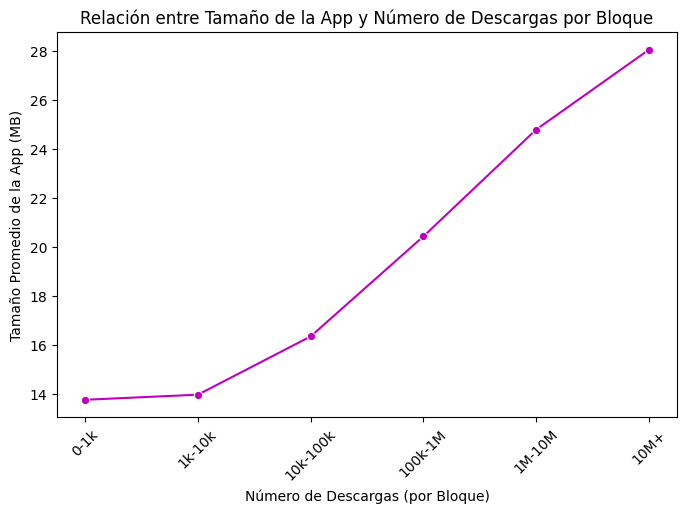

In [ ]:
# Agrupar por bloque de instalaciones y calcular el tamaño promedio
size_by_installs = df_apps.groupby('Installs_binned', observed=False)['Size'].mean().reset_index()

# Eliminar los dos últimos bloques de descargas
size_by_installs = size_by_installs[~size_by_installs['Installs_binned'].str.contains('10\+|50\+')]

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Size', data=size_by_installs, marker='o', color='m')
plt.title('Relación entre Tamaño de la App y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Tamaño Promedio de la App (MB)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

El gráfico muestra como existe una relación tal que **cuanto más alto es el tamaño de las Apps (en promedio) más alto es la cantidad de descargas**. Este patrón podría explicarse por el hecho de que las aplicaciones más grandes suelen ofrecer funcionalidades más completas o mejor calidad en términos de contenido y características, lo que atrae a un mayor número de usuarios. Además, las aplicaciones más grandes a menudo incluyen una mejor optimización para diferentes dispositivos y pueden incluir actualizaciones regulares, lo que también puede generar una mayor confianza y preferencia entre los usuarios.

Estos datos, además, permiten contestar otra **pregunta de interés**: **¿Las Apps más grandes en tamaño tienen menos descargas?** La respuesta es: No, por el contrario cuanto más grande en tamaño es la App, más descargas posee.



✅ Relación entre el Rating y las Categorías de las Apps

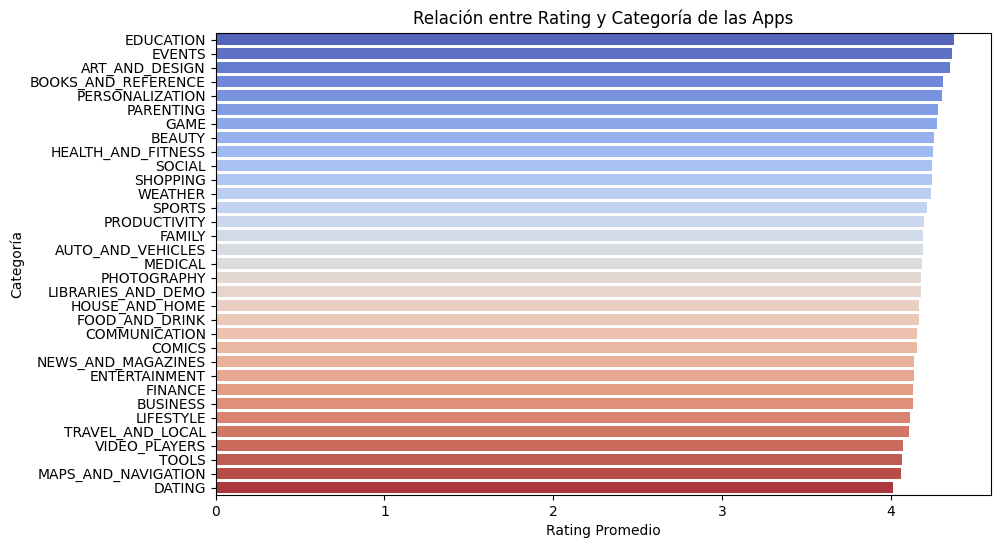

In [ ]:
# Calcular el rating promedio por categoría
rating_by_category = df_apps.groupby('Category', observed=False)['Rating'].mean().reset_index()

# Ordenar los datos por rating
rating_by_category = rating_by_category.sort_values(by='Rating', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Category', data=rating_by_category, hue='Category', palette='coolwarm', legend=False)
plt.title('Relación entre Rating y Categoría de las Apps')
plt.xlabel('Rating Promedio')
plt.ylabel('Categoría')
plt.show()

El gráfico muestra que las categorías Education, Events y Art and Design son las que mejor valoración poseen por parte de los usuarios. Mientras que Dating, Maps and Navigation y Tools son las que menos calificación poseen (si bien el promedio para todas es superior a los 4 puntos sobre 5).

Este gráfico permite contestar otra de las **preguntas de interés**: **¿Cuál es la categoría de Apps que posee mejor calificación?** La respuesta es: La categoría Education.

✅ Relación entre el Rating y el tipo de App según Restricciones de Edad en sus Usuarios

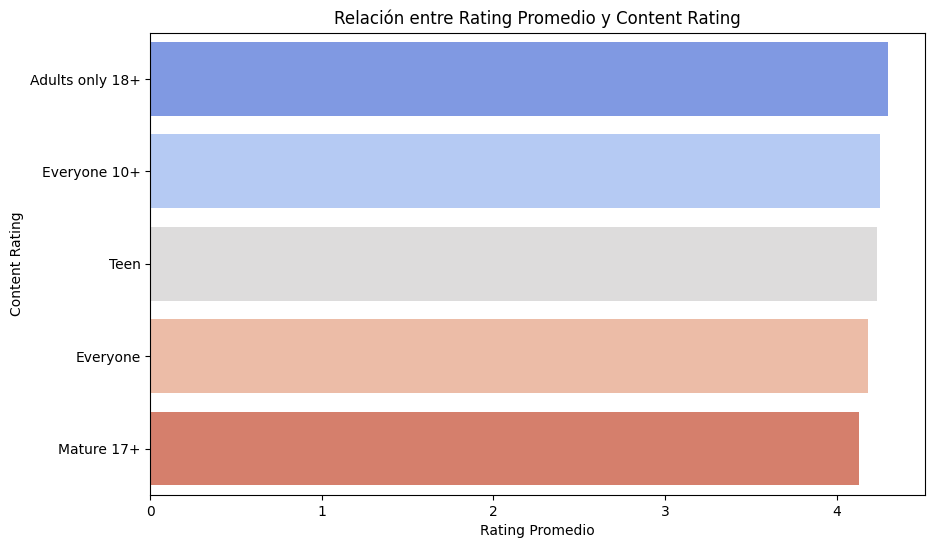

In [ ]:
# Calcular el rating promedio por Content Rating
rating_by_content = df_apps.groupby('Content Rating', observed=False)['Rating'].mean().reset_index()

# Ordenar los datos por rating (opcional)
rating_by_content = rating_by_content.sort_values(by='Rating', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Content Rating', data=rating_by_content, hue='Content Rating', palette='coolwarm', legend=False)
plt.title('Relación entre Rating Promedio y Content Rating')
plt.xlabel('Rating Promedio')
plt.ylabel('Content Rating')
plt.show()

El gráfico revela que las aplicaciones con restricciones de edad que permiten su descarga solo a mayores de 18 años tienden a recibir mejores calificaciones. En contraste, aquellas dirigidas a mayores de 17 años presentan las valoraciones más bajas, aunque, al igual que en el gráfico anterior, el promedio general para todas las categorías sigue siendo superior a 4 sobre 5.

✅ Relación entre el Rating y sus Precios (por Intérvalos)

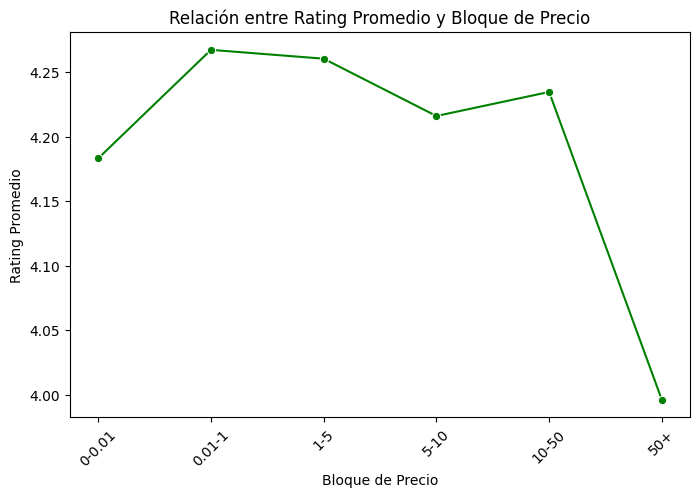

In [ ]:
# Calcular el rating promedio por bloque de precio
rating_by_price = df_apps.groupby('Price_binned', observed=False)['Rating'].mean().reset_index()

# Ordenar los datos por bloque de precio
rating_by_price = rating_by_price.sort_values(by='Price_binned')

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Price_binned', y='Rating', data=rating_by_price, marker='o', color='g')
plt.title('Relación entre Rating Promedio y Bloque de Precio')
plt.xlabel('Bloque de Precio')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.show()

El gráfico muestra que la calificación de las Apps es menor cuanto más costosa es la App. Ahondaremos en este tema al momento de esbozar las conclusiones y análisis de la Hipótesis propuesta al inicio de este trabajo.

✅ Tamaños Promedio de Apps por Categoría

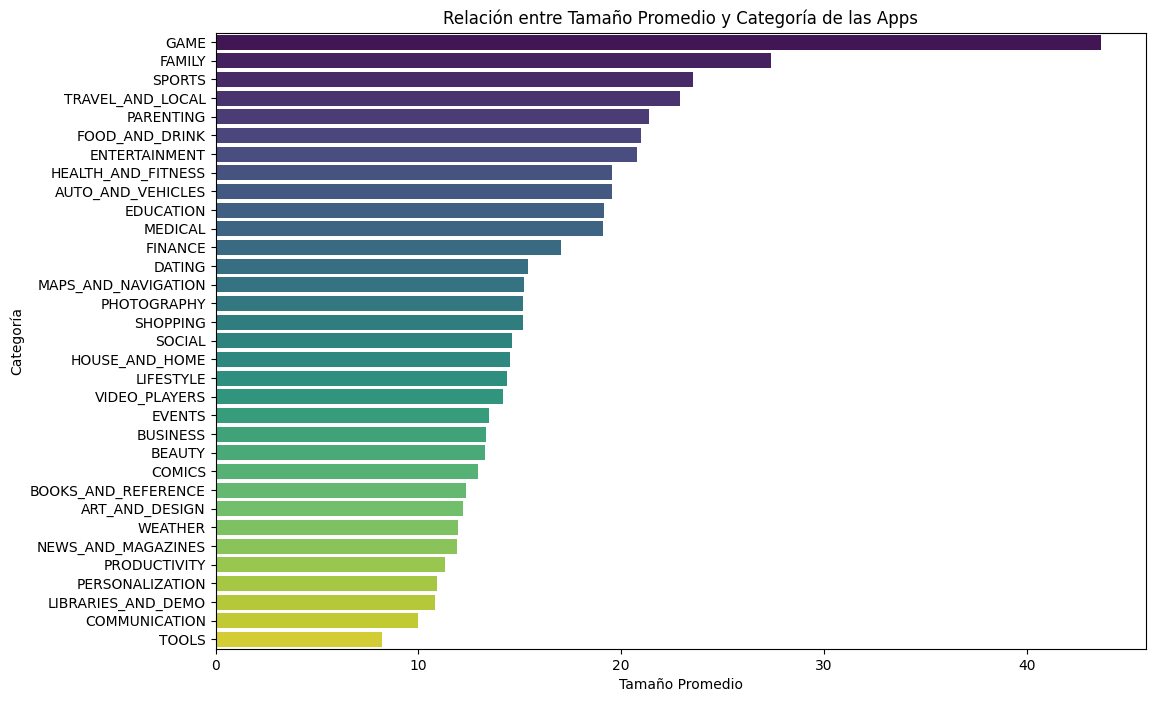

In [ ]:
# Calcular el tamaño promedio por categoría
size_by_category = df_apps.groupby('Category', observed=False)['Size'].mean().reset_index()

# Ordenar los datos por tamaño (opcional)
size_by_category = size_by_category.sort_values(by='Size', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(12, 8))
sns.barplot(x='Size', y='Category', data=size_by_category, hue='Category', palette='viridis', legend=False)
plt.title('Relación entre Tamaño Promedio y Categoría de las Apps')
plt.xlabel('Tamaño Promedio')
plt.ylabel('Categoría')
plt.show()

El gráfico revela que las categorías Game, Family y Sports presentan tamaños promedio de aplicaciones significativamente más grandes en comparación con otras categorías. Esto puede atribuirse a que las aplicaciones en estas categorías suelen ofrecer funcionalidades más complejas y gráficos de alta calidad, especialmente en el caso de las aplicaciones de juegos, que requieren mayor capacidad de almacenamiento para gráficos, niveles, datos de usuario y otros componentes interactivos. En el caso de las aplicaciones de Family y Sports, el tamaño más grande puede deberse a la inclusión de contenido multimedia, videos o datos de usuario almacenados localmente, lo que también requiere más espacio de almacenamiento.

Por otro lado, las categorías Communication y Tools tienen tamaños promedio más pequeños. Esto es comprensible ya que estas aplicaciones suelen centrarse en funcionalidades más ligeras y operaciones de datos más simples, como la mensajería o las herramientas básicas de productividad. Además, estas aplicaciones pueden aprovechar más las redes en la nube para almacenar datos, lo que reduce la necesidad de un gran espacio de almacenamiento local.

Este gráfico permite contestar a la **pregunta de interés**: **¿Qué categorías de Apps poseen mayor tamaño (en Mb)?** La respuesta es: La categoría Game.

✅ Tamaño Promedio por Tipo de App (Gratuita o de Pago)

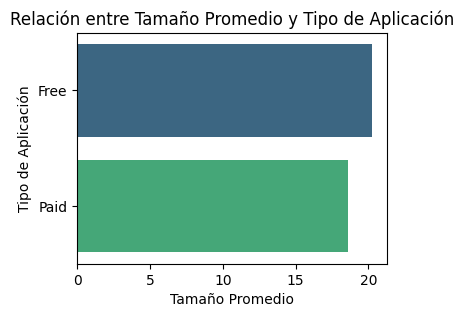

In [ ]:
# Calcular el tamaño promedio por tipo de aplicación
size_by_type = df_apps.groupby('Type', observed=False)['Size'].mean().reset_index()

# Ordenar los datos por tamaño (opcional)
size_by_type = size_by_type.sort_values(by='Size', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(4, 3))
sns.barplot(x='Size', y='Type', data=size_by_type, hue='Type', palette='viridis', legend=False)
plt.title('Relación entre Tamaño Promedio y Tipo de Aplicación')
plt.xlabel('Tamaño Promedio')
plt.ylabel('Tipo de Aplicación')
plt.show()

Este gráfico ilustra que las Apps gratuitas son ligeramente más grandes en tamaño (en promedio) que las pagas.

## HIPÓTESIS: ¿Confirmación o Refutación?

**"Las apps con precios más altos tienden a tener menos descargas, pero su rating promedio es más alto en comparación con las apps gratuitas."**

Llegamos al final y para responder a la pregunta si la hipótesis se confirma o se refuta lo primero que tenemos que hacer es determinar a qué llamamos "las apps con precios más altos". Luego de haber realizado un pormenorizado análisis de nuestro dataset podríamos considerar que **toda app cuyo valor sea igual o mayor a los 10 dólares** es considerada del grupo de **"las Apps con precios más altos"**.

Comencemos por analizar la primera parte de la hipótesis: **"Las apps con precios más altos tienden a tener menos descargas"**

### Realicemos y obervemos algunos gráficos:

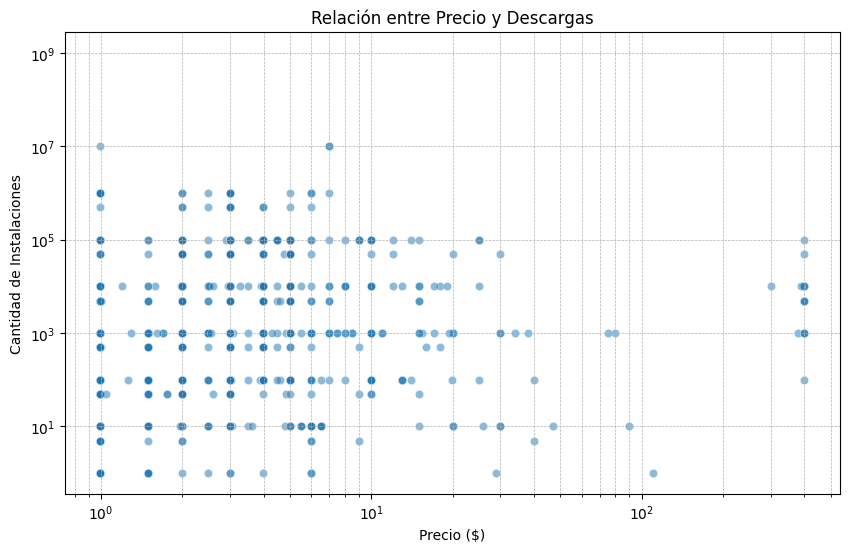

In [ ]:
# 1️⃣ Relación entre el precio y la cantidad de instalaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_apps, x="Price", y="Installs", alpha=0.5)
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.yscale("log")
plt.xlabel("Precio ($)")
plt.ylabel("Cantidad de Instalaciones")
plt.title("Relación entre Precio y Descargas")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

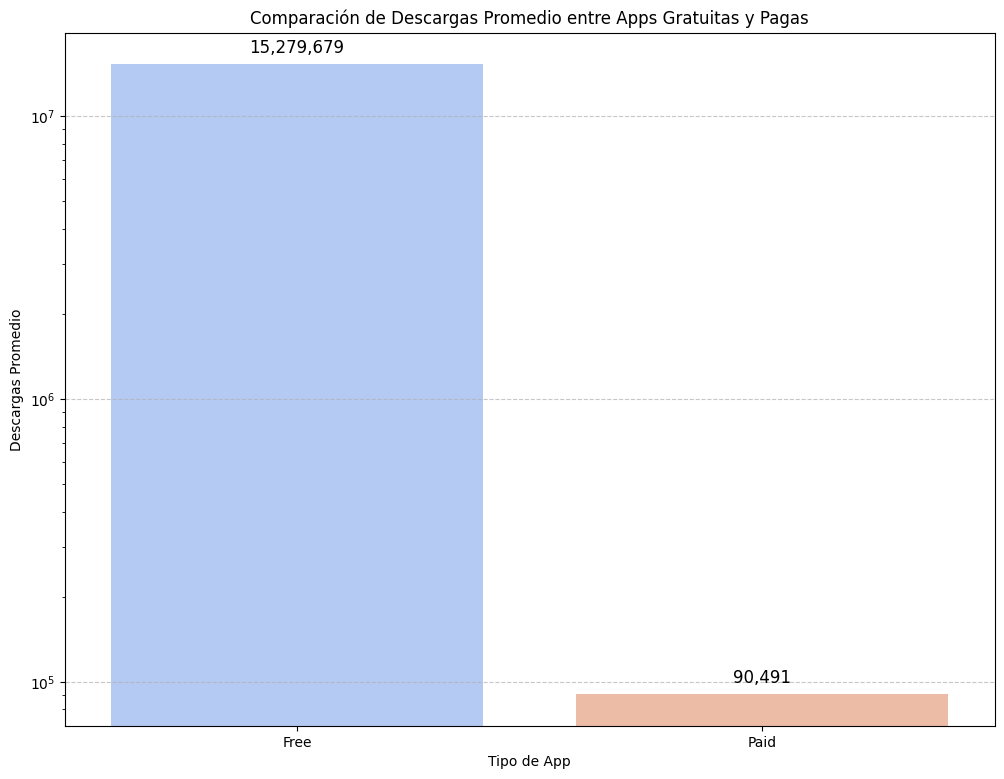

In [ ]:
# Calcular el promedio de instalaciones según el tipo de app
promedio_installs = df_apps.groupby("Type")["Installs"].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 9))
sns.barplot(x=promedio_installs.index, y=promedio_installs.values, hue=promedio_installs.index, palette="coolwarm", legend=False)

# Etiquetas y título
plt.xlabel("Tipo de App")
plt.ylabel("Descargas Promedio")
plt.title("Comparación de Descargas Promedio entre Apps Gratuitas y Pagas")
plt.yscale("log")  # Escala logarítmica para mejor visualización si hay mucha diferencia
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Agregar etiquetas con los valores exactos en las barras
for i, v in enumerate(promedio_installs.values):
    plt.text(i, v * 1.1, f"{int(v):,}", ha="center", fontsize=12)

plt.show()

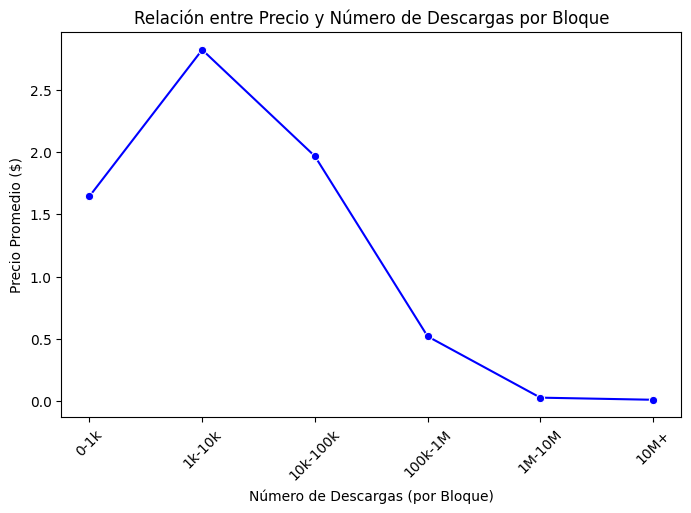

In [ ]:
# Agrupar por bloque de instalaciones y calcular el precio promedio
price_by_installs = df_apps.groupby('Installs_binned', observed=False)['Price'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Price', data=price_by_installs, marker='o', color='b')
plt.title('Relación entre Precio y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

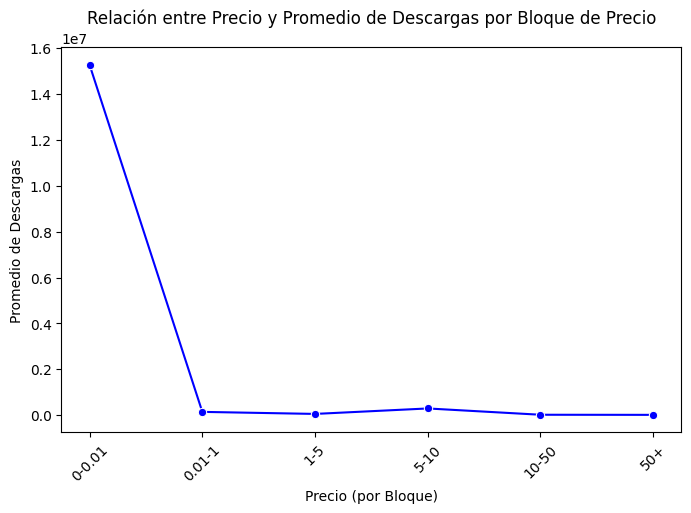

In [ ]:
# Agrupar por bloque de precios y calcular el promedio de cantidad de descargas
installs_by_price = df_apps.groupby('Price_binned', observed=False)['Installs'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Price_binned', y='Installs', data=installs_by_price, marker='o', color='b')
plt.title('Relación entre Precio y Promedio de Descargas por Bloque de Precio')
plt.xlabel('Precio (por Bloque)')
plt.ylabel('Promedio de Descargas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

Ahora veamos el mismo gráfico pero sin el primer intérvalo de precios:

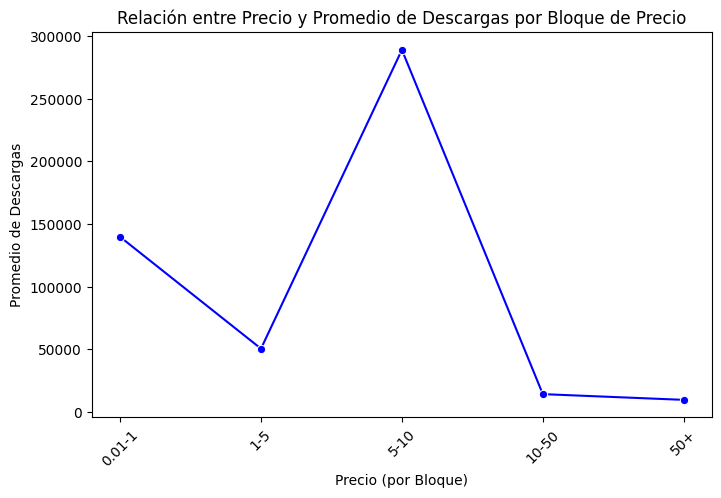

In [ ]:
# Agrupar por bloque de precios y calcular el promedio de cantidad de descargas
installs_by_price = df_apps.groupby('Price_binned', observed=False)['Installs'].mean().reset_index()

# Eliminar el primer bloque de precios (0-0.01)
installs_by_price = installs_by_price[installs_by_price['Price_binned'] != '0-0.01']

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Price_binned', y='Installs', data=installs_by_price, marker='o', color='b')
plt.title('Relación entre Precio y Promedio de Descargas por Bloque de Precio')
plt.xlabel('Precio (por Bloque)')
plt.ylabel('Promedio de Descargas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

# **Confirmación de la Primera Parte de la Hipótesis:**

La hipótesis plantea que "Las apps con precios más altos tienden a tener menos descargas". Según podemos observar de los gráficos anteriores esta afirmación se ha confirmado. A partir de los 5 dólares, **a medida que el precio de la aplicación aumenta, las descargas tienden a disminuir**. Si tenemos en cuenta que según nuestra hipótesis las Apps con costo igual o superior a 10 dólares son consideradas como del grupo de **"Apps con precios más altos"** entonces claramente la primera parte de la hipótesis se confirma y puede observarse de forma nítida en el último de los gráficos de línea.

Esto es coherente con el comportamiento general de los usuarios, donde prefieren aplicaciones gratuitas o de bajo costo, especialmente en mercados donde las alternativas son muchas y accesibles.



**Ahora sigamos con la segunda parte de la hipótesis: "su rating promedio es más alto en comparación con las apps gratuitas."** (Se refiere a que el rating promedio de las "Apps con precios más altos" es más alto que el de las Apps gratuitas).

Para poder determinar si se confirma o no está afirmación realicemos y veamos algunos gráficos:

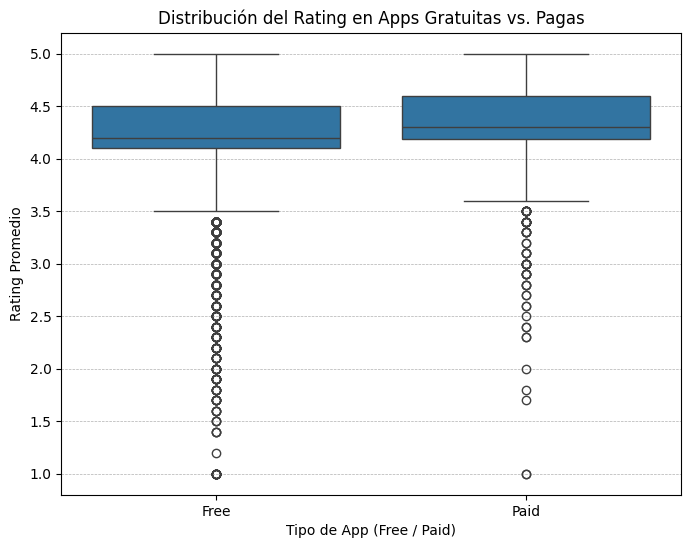

In [ ]:
# 2️⃣ Distribución del rating en apps gratuitas vs. pagas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_apps, x="Type", y="Rating")
plt.xlabel("Tipo de App (Free / Paid)")
plt.ylabel("Rating Promedio")
plt.title("Distribución del Rating en Apps Gratuitas vs. Pagas")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
promedio_rating = df_apps.groupby("Type")["Rating"].mean()
print(promedio_rating)

Type
Free   4.18
Paid   4.25
Name: Rating, dtype: float64


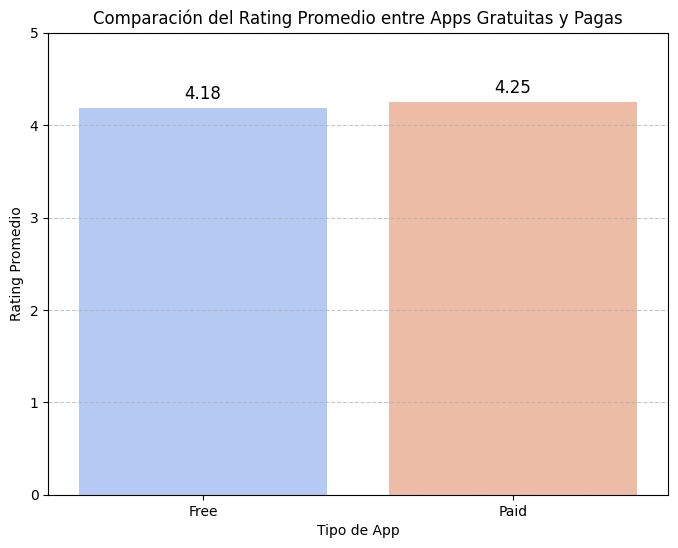

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=promedio_rating.index, y=promedio_rating.values, hue=promedio_rating.index, palette="coolwarm", legend=False)

plt.xlabel("Tipo de App")
plt.ylabel("Rating Promedio")
plt.title("Comparación del Rating Promedio entre Apps Gratuitas y Pagas")
plt.ylim(0, 5)  # Ajustar el eje Y para que se mantenga dentro del rango de calificaciones
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Agregar etiquetas con los valores exactos en las barras
for i, v in enumerate(promedio_rating.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha="center", fontsize=12)

plt.show()

Está claro que la calificación promedio de las Apps de pago es mayor al de las Apps gratuitas. Sin embargo, no debemos olvidar que nuestra segmento a analizar son las **Apps con precios más altos**, es decir, a**quellas de valor igual o superior a 10 dólares** (y no todo el conjunto de Apps de pago).

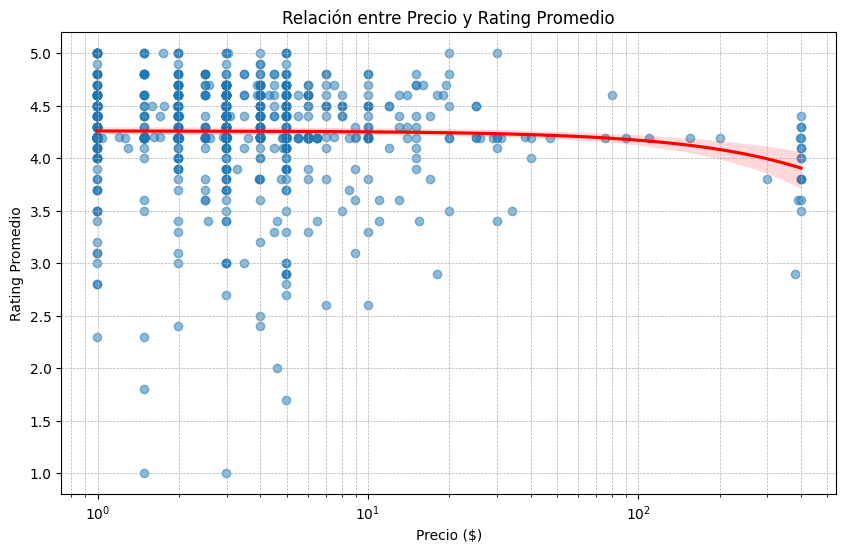

In [ ]:
# 3️⃣ Relación entre el precio y el rating promedio
plt.figure(figsize=(10, 6))
sns.regplot(data=df_apps[df_apps["Price"] > 0], x="Price", y="Rating", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xscale("log")  # Escala logarítmica para ver mejor los datos
plt.xlabel("Precio ($)")
plt.ylabel("Rating Promedio")
plt.title("Relación entre Precio y Rating Promedio")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
promedio_rating_por_precio = df_apps.groupby("Price_binned", observed=True)["Rating"].mean()
print(promedio_rating_por_precio)

Price_binned
0-0.01   4.18
0.01-1   4.27
1-5      4.26
5-10     4.22
10-50    4.23
50+      4.00
Name: Rating, dtype: float64


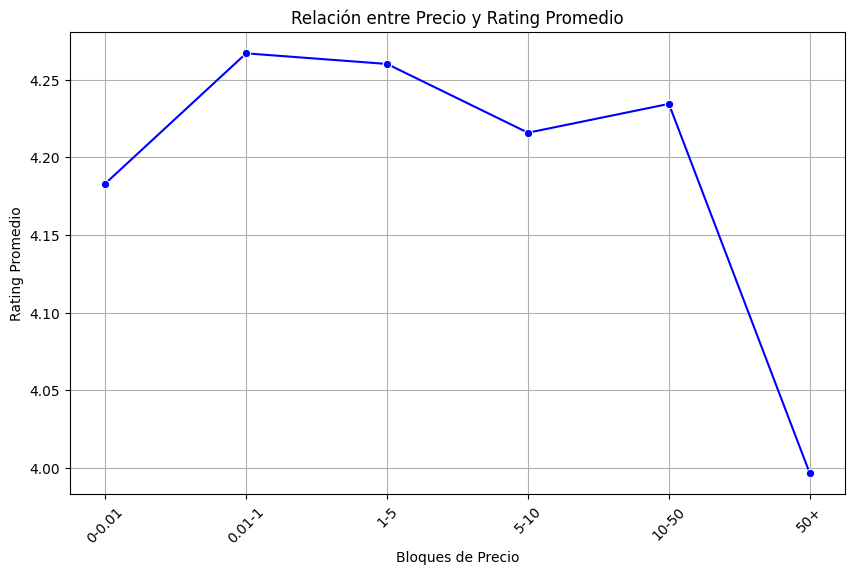

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_apps.groupby("Price_binned", observed=True)["Rating"].mean(), marker="o", color="b")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.xlabel("Bloques de Precio")
plt.ylabel("Rating Promedio")
plt.title("Relación entre Precio y Rating Promedio")
plt.grid(True)
plt.show()

Estos gráficos muestran claramente que, **luego de determinado nivel de precio, a medida el precio de la App sube su calificación baja**. Pero... **¿bajará lo suficiente para encontrarse por debajo del promedio de calificación de las Apps gratuitas?**

**Llegamos al momento final del que depende si  la hipótesis se confirma o se refuta... El promedio de rating de las Apps gratuitas ¿es mayor o menor que el promedio de rating de las Apps más caras (precios iguales o mayores a los U$S 10,00)?**

El siguiente gráfico lo ilustrará:

Promedio de rating de las apps que valen igual o más de 10 dólares: 4.163399758136601
Promedio de rating de las apps gratuitas: 4.1831716184052015


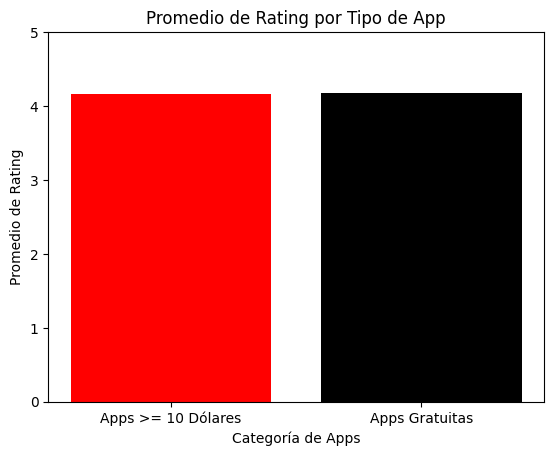

In [ ]:
# Filtramos las apps que tienen un precio mayor o igual a 10 dólares
apps_mas_10_dolares = df_apps[df_apps['Price'] >= 10]

# Filtramos las apps gratuitas (suponiendo que 'price' es 0 para apps gratuitas)
apps_gratuitas = df_apps[df_apps['Price'] == 0]

# Calculamos el promedio de la columna 'rating' solo para esas apps
promedio_rating_mas_10_dolares = apps_mas_10_dolares['Rating'].mean()
promedio_rating_gratuitas = apps_gratuitas['Rating'].mean()

# Imprimir los resultados
print(f"Promedio de rating de las apps que valen igual o más de 10 dólares: {promedio_rating_mas_10_dolares}")
print(f"Promedio de rating de las apps gratuitas: {promedio_rating_gratuitas}")

# Crear el gráfico de barras
categorias = ['Apps >= 10 Dólares', 'Apps Gratuitas']
promedios = [promedio_rating_mas_10_dolares, promedio_rating_gratuitas]

plt.bar(categorias, promedios, color=['red', 'black'])
plt.xlabel('Categoría de Apps')
plt.ylabel('Promedio de Rating')
plt.title('Promedio de Rating por Tipo de App')
plt.ylim(0, 5)  # Para limitar el rango del eje Y (si el rating va de 0 a 5)
plt.show()

# **Refutación de la Segunda Parte de la Hipótesis:**

De acuerdo a los datos y gráfico anteriores esta segunda parte de la Hipótesis se refuta. **El promedio de calificación de las Apps con un precio igual o mayor a los 10 dólares ("Apps más caras") es inferior al promedio de calificación de las Apps gratuitas**.

Promedio de rating de las apps que valen igual o más de 10 dólares: 4.16

Promedio de rating de las apps gratuitas: 4.18

# 🏁 **CONCLUSIÓN FINAL:**

Luego de un análisis detallado de los datos, podemos afirmar que **la hipótesis se confirma parcialmente**.

En primer lugar, **la afirmación de que "las apps con precios más altos tienden a tener menos descargas" se valida con los datos analizados**. A partir de los 5 dólares, se observa una clara tendencia decreciente en la cantidad de descargas, y esta relación se vuelve aún más evidente en las aplicaciones con un precio igual o superior a 10 dólares, que hemos definido como el grupo de "apps con precios más altos". Este comportamiento es coherente con las preferencias generales de los usuarios, quienes tienden a optar por aplicaciones gratuitas o de bajo costo, especialmente en mercados con múltiples alternativas accesibles.

Sin embargo, **la segunda parte de la hipótesis —"las apps con precios más altos tienen un rating promedio más alto en comparación con las apps gratuitas"— se refuta**. Aunque en términos generales las aplicaciones de pago tienden a tener mejores calificaciones que las gratuitas, al centrarnos específicamente en el grupo de "apps con precios más altos" (precio igual o superior a 10 dólares), observamos que su calificación promedio es de 4.16, mientras que la de las apps gratuitas es de 4.18. Esto indica que, a partir de cierto umbral de precio, la calificación de las aplicaciones comienza a disminuir en lugar de aumentar.

Este resultado sugiere que, aunque los usuarios pueden valorar positivamente las aplicaciones de pago en general, cuando el precio es demasiado alto, las expectativas también aumentan. Si estas aplicaciones no cumplen con esas expectativas, es posible que reciban calificaciones más bajas en comparación con opciones gratuitas bien valoradas.

En conclusión, **confirmamos que las aplicaciones más costosas tienen menos descargas, pero refutamos la idea de que su rating promedio sea más alto que el de las apps gratuitas**. Esto abre la posibilidad de futuros estudios que exploren factores adicionales.

Para finalizar **una versión corregida de la hipótesis**, basada en los hallazgos del análisis podría ser:

**"Las apps con precios más altos tienden a tener menos descargas, y su rating promedio no es necesariamente superior al de las apps gratuitas, ya que a partir de cierto nivel de precio, la calificación tiende a disminuir."**

## Autor: Alejandro Traversa Olazabal

🔗 https://www.linkedin.com/in/alejandro-traversa-olazabal/